# Marketing Analysis

In [1]:
# A company wants to run a campaign of a new product
# and asks for the analysis to get an optimized campaign 
# for this season from previous campaign data result.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set_style='whitegrid'
sns.set(rc={'figure.figsize':(5,4)})

import warnings
warnings.filterwarnings("ignore")

In [3]:
csv = os.getcwd() + r'/datasets/marketing_campaign.csv'

In [4]:
df = pd.read_csv(csv, delimiter=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Quality Check & Data Acknowledgement

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Convert data types
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')

In [7]:
# check year, month, day
print(df['Dt_Customer'][0], "->", df['Dt_Customer'].dt.year[0], df['Dt_Customer'].dt.month[0], df['Dt_Customer'].dt.day[0])

2012-09-04 00:00:00 -> 2012 9 4


In [8]:
# Remove unused cols
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Complain'], axis=1, inplace=True)

In [9]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,0,0,0,0


In [10]:
# Remove duplicated rows by id
df.duplicated(subset=['ID']).sum()

0

In [11]:
# There's no duplicated row, so I'm gonna remove the ID. I'm not gonna use ID to do analysis
df.drop(columns=['ID'], axis=1, inplace=True)

In [12]:
df['Marital_Status'].replace(to_replace={'YOLO':'Single', 'Absurd':'Single', 'Alone':'Single'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

## Data Split

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [16]:
df_train_full.shape

(1792, 25)

In [17]:
df_test.shape

(448, 25)

In [18]:
df_train, df_valid = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [19]:
df_train.shape

(1344, 25)

In [20]:
df_valid.shape

(448, 25)

## Data Preprocessing I (Before Split)
This preprocessing is specially used for analysis using df.

In [21]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,3,6,5,0,0,0,0,0,0


In [22]:
df_ = df[:][:].copy()

In [23]:
# next : create new column 'Age', 'TotalAmountSpent', 'TotalPurchasedItems'
# todo : inspect the null value of the field in relation to the new column
df_.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
dtype: int64

In [24]:
df_['Income'] = df_['Income'].fillna(value=df_.Income.median())

In [25]:
total_amount_spent = [col for col in df_.columns if 'Mnt' in col]
df_['Total_Amnt_Spent'] = df_[total_amount_spent].sum(axis=1)

In [26]:
cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
total_purch_items = df_.loc[:][cols].sum(axis=1)

In [27]:
df_ = df_.assign(Cust_Age=(df_.Dt_Customer.dt.year-df_.Year_Birth), Total_Purchased_Items=total_purch_items)

Year_Birth                  Axes(0.125,0.747241;0.133621x0.132759)
Income                   Axes(0.285345,0.747241;0.133621x0.132759)
Kidhome                   Axes(0.44569,0.747241;0.133621x0.132759)
Teenhome                 Axes(0.606034,0.747241;0.133621x0.132759)
Recency                  Axes(0.766379,0.747241;0.133621x0.132759)
MntWines                    Axes(0.125,0.587931;0.133621x0.132759)
MntFruits                Axes(0.285345,0.587931;0.133621x0.132759)
MntMeatProducts           Axes(0.44569,0.587931;0.133621x0.132759)
MntFishProducts          Axes(0.606034,0.587931;0.133621x0.132759)
MntSweetProducts         Axes(0.766379,0.587931;0.133621x0.132759)
MntGoldProds                Axes(0.125,0.428621;0.133621x0.132759)
NumDealsPurchases        Axes(0.285345,0.428621;0.133621x0.132759)
NumWebPurchases           Axes(0.44569,0.428621;0.133621x0.132759)
NumCatalogPurchases      Axes(0.606034,0.428621;0.133621x0.132759)
NumStorePurchases        Axes(0.766379,0.428621;0.133621x0.132

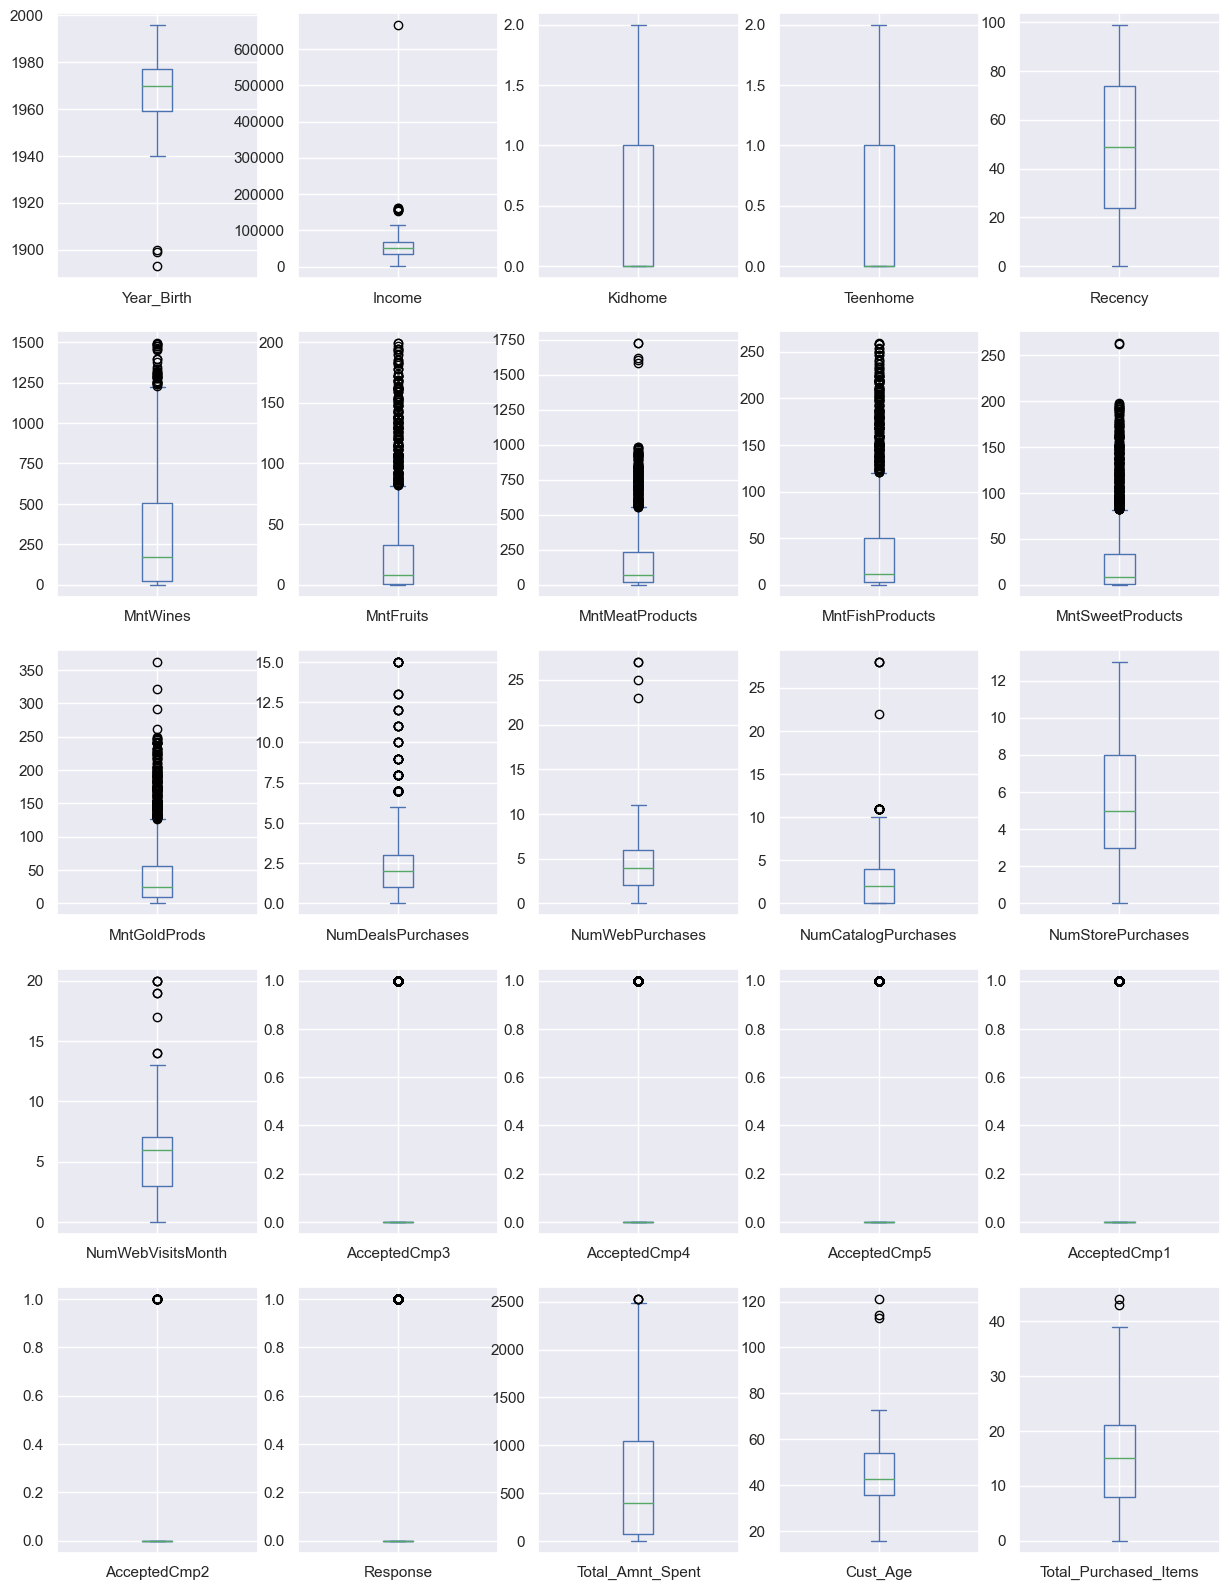

In [28]:
# check outliers
df_plot = df_.select_dtypes(include=['int64', 'float64'])
df_plot.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))

In [29]:
# check min max value
for dtype, col in list(zip(df_.dtypes, df_.columns)):
    if dtype == 'float64' or dtype == 'int64':
        print(col, df_[col].min(), df_[col].max())
        print()

Year_Birth 1893 1996

Income 1730.0 666666.0

Kidhome 0 2

Teenhome 0 2

Recency 0 99

MntWines 0 1493

MntFruits 0 199

MntMeatProducts 0 1725

MntFishProducts 0 259

MntSweetProducts 0 263

MntGoldProds 0 362

NumDealsPurchases 0 15

NumWebPurchases 0 27

NumCatalogPurchases 0 28

NumStorePurchases 0 13

NumWebVisitsMonth 0 20

AcceptedCmp3 0 1

AcceptedCmp4 0 1

AcceptedCmp5 0 1

AcceptedCmp1 0 1

AcceptedCmp2 0 1

Response 0 1

Total_Amnt_Spent 5 2525

Cust_Age 16 121

Total_Purchased_Items 0 44



In [30]:
# Gonna remove people with year_birth < 1900
df_ = df_[ df_['Year_Birth'] > 1900 ]

In [31]:
print(df_.Year_Birth.min(), df_.Cust_Age.max())

1940 73


Year_Birth                  Axes(0.125,0.747241;0.133621x0.132759)
Income                   Axes(0.285345,0.747241;0.133621x0.132759)
Kidhome                   Axes(0.44569,0.747241;0.133621x0.132759)
Teenhome                 Axes(0.606034,0.747241;0.133621x0.132759)
Recency                  Axes(0.766379,0.747241;0.133621x0.132759)
MntWines                    Axes(0.125,0.587931;0.133621x0.132759)
MntFruits                Axes(0.285345,0.587931;0.133621x0.132759)
MntMeatProducts           Axes(0.44569,0.587931;0.133621x0.132759)
MntFishProducts          Axes(0.606034,0.587931;0.133621x0.132759)
MntSweetProducts         Axes(0.766379,0.587931;0.133621x0.132759)
MntGoldProds                Axes(0.125,0.428621;0.133621x0.132759)
NumDealsPurchases        Axes(0.285345,0.428621;0.133621x0.132759)
NumWebPurchases           Axes(0.44569,0.428621;0.133621x0.132759)
NumCatalogPurchases      Axes(0.606034,0.428621;0.133621x0.132759)
NumStorePurchases        Axes(0.766379,0.428621;0.133621x0.132

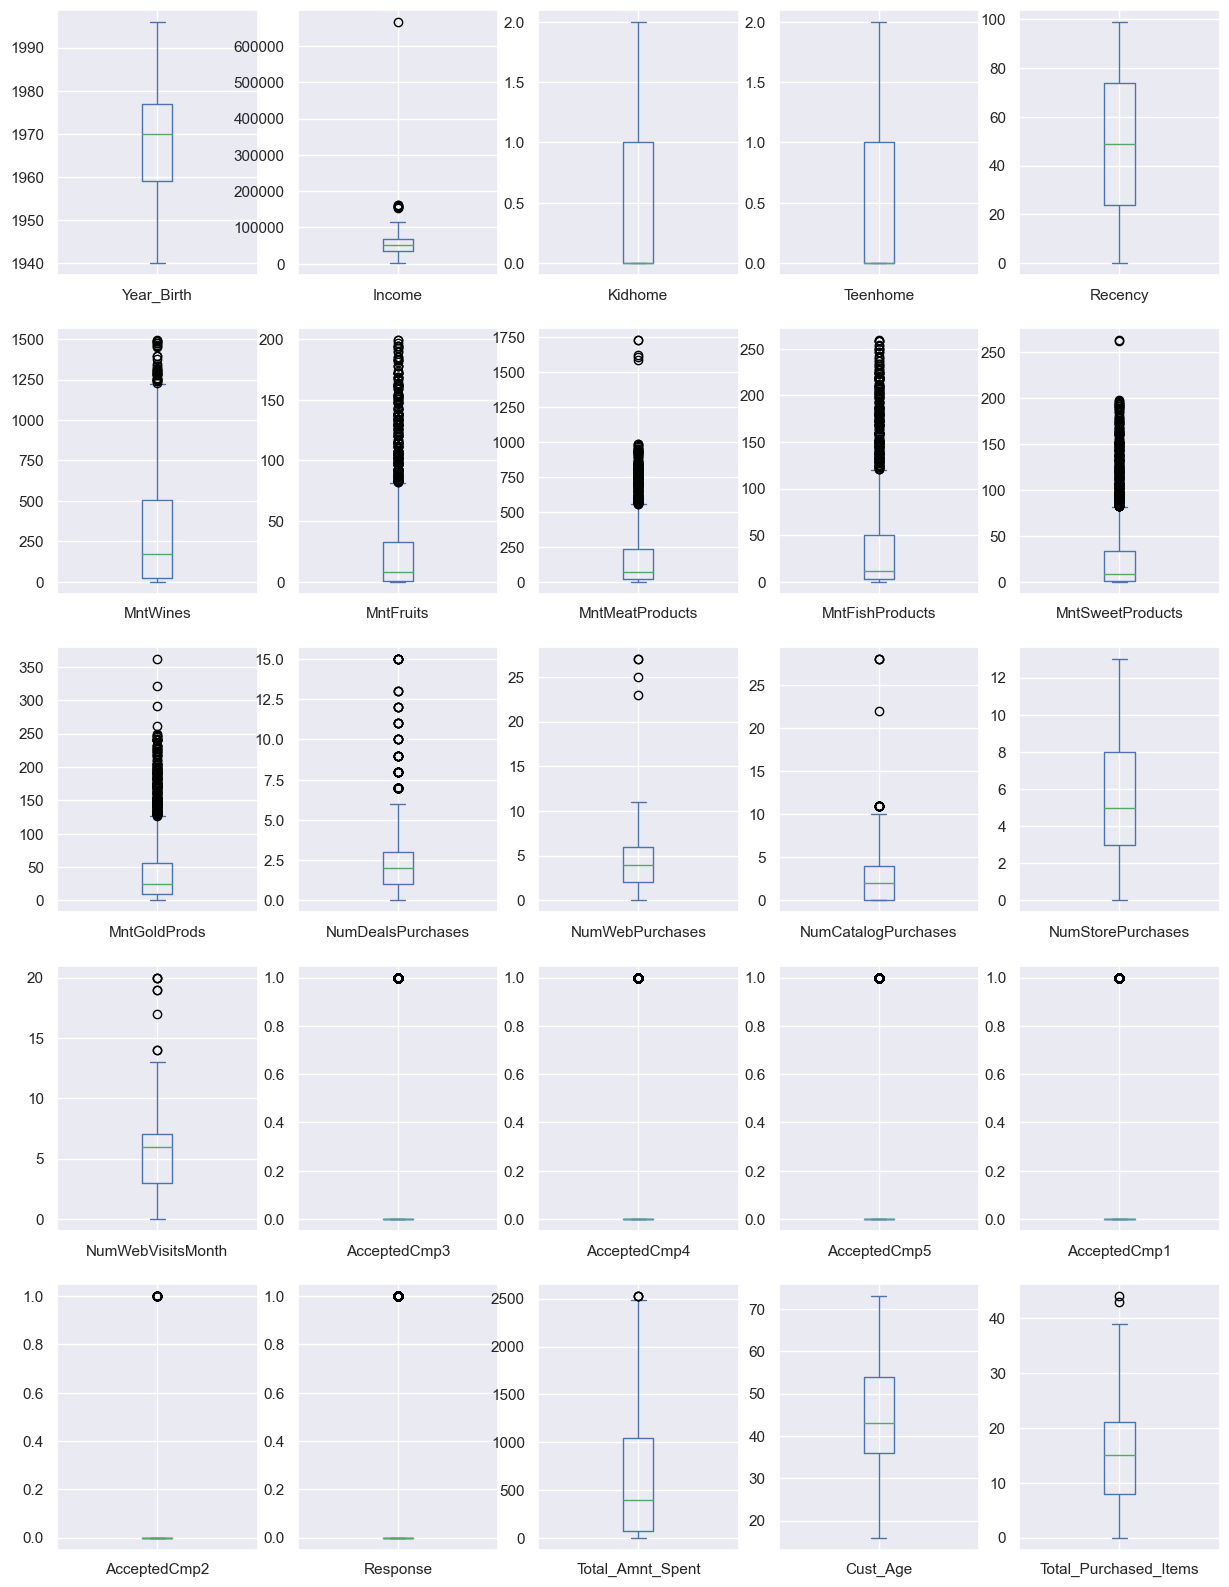

In [32]:
df_plot = df_.select_dtypes(include=['int64', 'float64'])
df_plot.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))

## Data Preprocessing II (After Split)

In [33]:
def check_nan(df):
    list = []
    for i in df:
        isnan = True if (df[i].isna().sum() > 0) else False
        if isnan:
            list.append(i)
    return list

In [34]:
train_isnan = check_nan(df_train)
valid_isnan = check_nan(df_valid)
test_isnan = check_nan(df_test)
print(train_isnan, valid_isnan, test_isnan)

['Income'] ['Income'] ['Income']


In [35]:
# Mean: When your dataset is in a normal distribution, you can use mean to fill in the missing values.
# Median: When your dataset is not in a normal distribution, you can use the median value to fill in the missing values.
# Median is also preferred when the distribution is skewed, as it is less sensitive to outliers than the mean.
# Mode: When the missing values in your data are categorical and discrete, you can use the mode value to fill in the missing values.

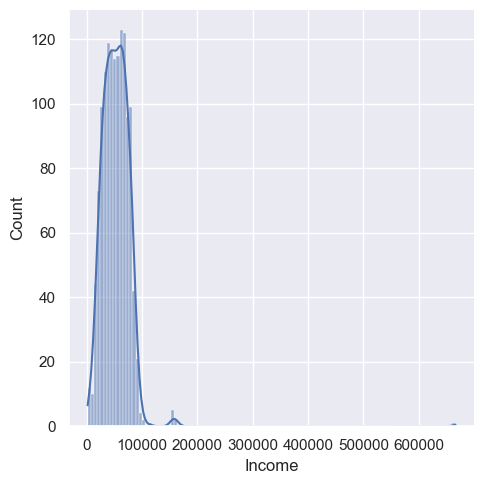

In [36]:
# Check the distribution of data
sns.displot(data=df_train, x='Income', kde=True)

In [37]:
# Gonna use median, because it's preferrable for skewed distribution and outliers.
df_train['Income'] = df_train['Income'].fillna(value=df_train.Income.median())
df_valid['Income'] = df_valid['Income'].fillna(value=df_valid.Income.median())
df_test['Income'] = df_test['Income'].fillna(value=df_test.Income.median())

Year_Birth                Axes(0.125,0.747241;0.133621x0.132759)
Income                 Axes(0.285345,0.747241;0.133621x0.132759)
Kidhome                 Axes(0.44569,0.747241;0.133621x0.132759)
Teenhome               Axes(0.606034,0.747241;0.133621x0.132759)
Recency                Axes(0.766379,0.747241;0.133621x0.132759)
MntWines                  Axes(0.125,0.587931;0.133621x0.132759)
MntFruits              Axes(0.285345,0.587931;0.133621x0.132759)
MntMeatProducts         Axes(0.44569,0.587931;0.133621x0.132759)
MntFishProducts        Axes(0.606034,0.587931;0.133621x0.132759)
MntSweetProducts       Axes(0.766379,0.587931;0.133621x0.132759)
MntGoldProds              Axes(0.125,0.428621;0.133621x0.132759)
NumDealsPurchases      Axes(0.285345,0.428621;0.133621x0.132759)
NumWebPurchases         Axes(0.44569,0.428621;0.133621x0.132759)
NumCatalogPurchases    Axes(0.606034,0.428621;0.133621x0.132759)
NumStorePurchases      Axes(0.766379,0.428621;0.133621x0.132759)
NumWebVisitsMonth        

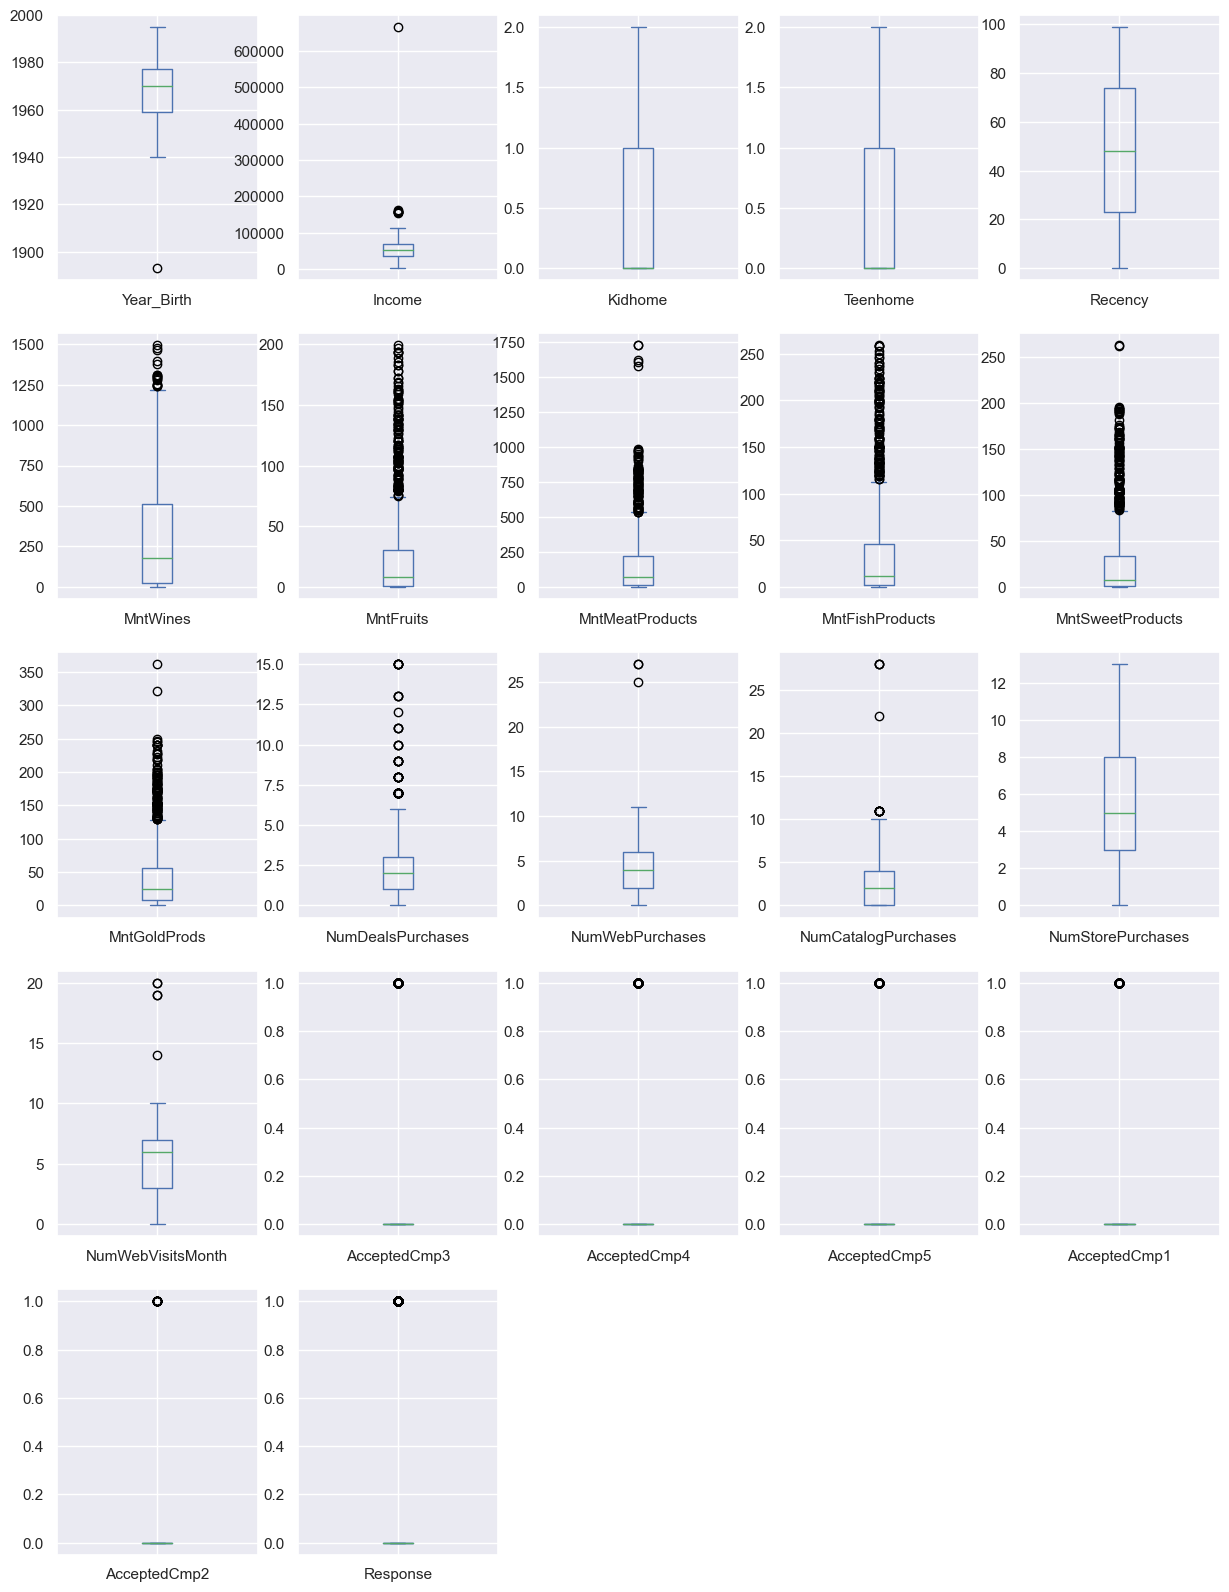

In [38]:
# Check outliers
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
df_plot_train = df_train.select_dtypes(include=['float64','int64'])
df_plot_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))                                            

In [39]:
print(df_train.Year_Birth.min(), df_train.Year_Birth.max())

1893 1995


In [40]:
# Remove rows with birth year < 1900
df_train = df_train[ (df_train['Year_Birth'] > 1900) ]

Year_Birth                Axes(0.125,0.747241;0.133621x0.132759)
Income                 Axes(0.285345,0.747241;0.133621x0.132759)
Kidhome                 Axes(0.44569,0.747241;0.133621x0.132759)
Teenhome               Axes(0.606034,0.747241;0.133621x0.132759)
Recency                Axes(0.766379,0.747241;0.133621x0.132759)
MntWines                  Axes(0.125,0.587931;0.133621x0.132759)
MntFruits              Axes(0.285345,0.587931;0.133621x0.132759)
MntMeatProducts         Axes(0.44569,0.587931;0.133621x0.132759)
MntFishProducts        Axes(0.606034,0.587931;0.133621x0.132759)
MntSweetProducts       Axes(0.766379,0.587931;0.133621x0.132759)
MntGoldProds              Axes(0.125,0.428621;0.133621x0.132759)
NumDealsPurchases      Axes(0.285345,0.428621;0.133621x0.132759)
NumWebPurchases         Axes(0.44569,0.428621;0.133621x0.132759)
NumCatalogPurchases    Axes(0.606034,0.428621;0.133621x0.132759)
NumStorePurchases      Axes(0.766379,0.428621;0.133621x0.132759)
NumWebVisitsMonth        

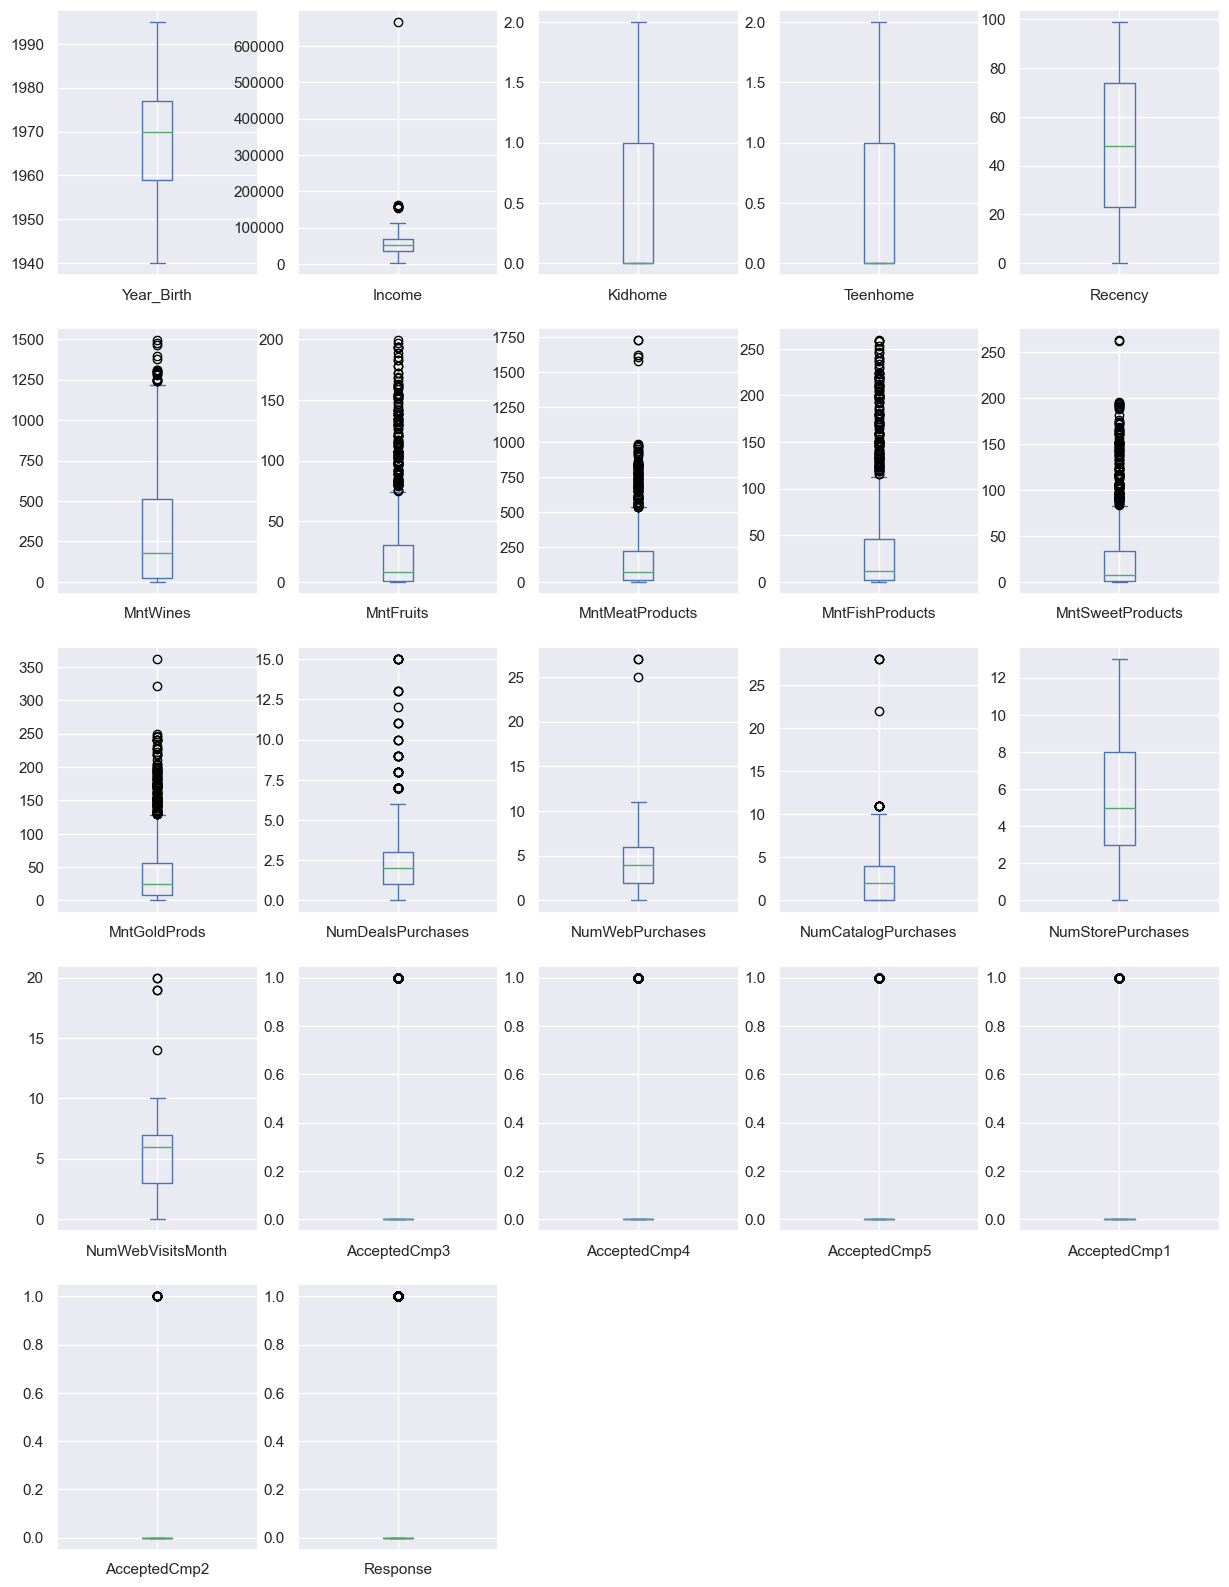

In [41]:
df_plot_train = df_train.select_dtypes(include=['float64','int64'])
df_plot_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,20))   

In [42]:
df_valid = df_valid[(df_valid.Year_Birth > 1900)]
df_test = df_test[(df_test.Year_Birth > 1900)]

#### Categorical Preprocessing

In [43]:
df_train.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
1935,1975,2n Cycle,Together,34984.0,1,1,2012-09-06,40,8,4,...,1,0,3,7,0,0,0,0,0,0
1395,1956,Master,Married,63915.0,0,2,2013-07-30,2,622,7,...,6,3,12,5,0,0,0,0,0,0
1359,1971,Master,Single,33316.0,1,1,2013-10-04,34,79,1,...,2,1,4,6,0,0,0,0,0,0
74,1952,Graduation,Married,28332.0,0,0,2014-04-30,58,14,10,...,2,1,4,2,0,0,0,0,0,0
531,1969,Graduation,Single,72679.0,0,1,2013-09-18,65,619,54,...,4,7,5,1,0,0,0,0,0,0


In [44]:
print(df.Marital_Status.unique())
print(df.Education.unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [45]:
# ordinal (tingkatan)
cols_education = {
    'Basic':1,
    '2n Cycle':2,
    'Graduation':3,
    'Master':4,
    'PhD':5
}

In [46]:
df_train_encode = df_train[:][:].copy()
df_test_encode = df_test[:][:].copy()
df_valid_encode = df_valid[:][:].copy()

In [47]:
df_train_encode['Education'] = df_train_encode['Education'].map(cols_education)
df_test_encode['Education'] = df_test_encode['Education'].map(cols_education)
df_valid_encode['Education'] = df_valid_encode['Education'].map(cols_education)

In [48]:
df_train_encode.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
1935,1975,2,Together,34984.0,1,1,2012-09-06,40,8,4,...,1,0,3,7,0,0,0,0,0,0
1395,1956,4,Married,63915.0,0,2,2013-07-30,2,622,7,...,6,3,12,5,0,0,0,0,0,0
1359,1971,4,Single,33316.0,1,1,2013-10-04,34,79,1,...,2,1,4,6,0,0,0,0,0,0
74,1952,3,Married,28332.0,0,0,2014-04-30,58,14,10,...,2,1,4,2,0,0,0,0,0,0
531,1969,3,Single,72679.0,0,1,2013-09-18,65,619,54,...,4,7,5,1,0,0,0,0,0,0


In [49]:
df_train_encode = df_train_encode.assign(Dt_Customer_Year=df_train_encode.Dt_Customer.dt.year, Dt_Customer_Month=df_train_encode.Dt_Customer.dt.month, 
                       Dt_Customer_Date=df_train_encode.Dt_Customer.dt.day)
df_test_encode = df_test_encode.assign(Dt_Customer_Year=df_test_encode.Dt_Customer.dt.year, Dt_Customer_Month=df_test_encode.Dt_Customer.dt.month, 
                       Dt_Customer_Date=df_test_encode.Dt_Customer.dt.day)
df_valid_encode = df_valid_encode.assign(Dt_Customer_Year=df_valid_encode.Dt_Customer.dt.year, Dt_Customer_Month=df_valid_encode.Dt_Customer.dt.month, 
                       Dt_Customer_Date=df_valid_encode.Dt_Customer.dt.day)

In [50]:
df_train_encode = df_train_encode.drop(columns=['Dt_Customer'], axis=1, inplace=False)
df_test_encode = df_test_encode.drop(columns=['Dt_Customer'], axis=1, inplace=False)
df_valid_encode = df_valid_encode.drop(columns=['Dt_Customer'], axis=1, inplace=False)

In [51]:
df_train_encode.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Date
1935,1975,2,Together,34984.0,1,1,40,8,4,15,...,7,0,0,0,0,0,0,2012,9,6
1395,1956,4,Married,63915.0,0,2,2,622,7,115,...,5,0,0,0,0,0,0,2013,7,30
1359,1971,4,Single,33316.0,1,1,34,79,1,31,...,6,0,0,0,0,0,0,2013,10,4
74,1952,3,Married,28332.0,0,0,58,14,10,13,...,2,0,0,0,0,0,0,2014,4,30
531,1969,3,Single,72679.0,0,1,65,619,54,260,...,1,0,0,0,0,0,0,2013,9,18


In [52]:
# nominal 
from sklearn.feature_extraction import DictVectorizer

In [53]:
v = DictVectorizer(sparse=False)

In [54]:
df_train_list_dicts = df_train_encode.to_dict(orient='records') # Transforms lists of feature-value
df_test_list_dicts = df_test_encode.to_dict(orient='records') # Transforms lists of feature-value
df_valid_list_dicts = df_valid_encode.to_dict(orient='records') # Transforms lists of feature-value

In [55]:
df_train_list_dicts[:1]

[{'Year_Birth': 1975,
  'Education': 2,
  'Marital_Status': 'Together',
  'Income': 34984.0,
  'Kidhome': 1,
  'Teenhome': 1,
  'Recency': 40,
  'MntWines': 8,
  'MntFruits': 4,
  'MntMeatProducts': 15,
  'MntFishProducts': 3,
  'MntSweetProducts': 5,
  'MntGoldProds': 3,
  'NumDealsPurchases': 2,
  'NumWebPurchases': 1,
  'NumCatalogPurchases': 0,
  'NumStorePurchases': 3,
  'NumWebVisitsMonth': 7,
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'Response': 0,
  'Dt_Customer_Year': 2012,
  'Dt_Customer_Month': 9,
  'Dt_Customer_Date': 6}]

In [56]:
df_train_ = v.fit_transform(df_train_list_dicts)
df_train_

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.975e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        1.956e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.971e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.000e+00,
        1.960e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.971e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.968e+03]])

In [57]:
df_test_ = v.transform(df_test_list_dicts)
df_valid_ = v.transform(df_valid_list_dicts)

In [58]:
df_train_temp = pd.DataFrame(data=df_train_, columns=v.get_feature_names_out())
df_test_temp = pd.DataFrame(data=df_test_, columns=v.get_feature_names_out())
df_valid_temp = pd.DataFrame(data=df_valid_, columns=v.get_feature_names_out())

In [59]:
display(df_train_encode[:5])
print(df_train_encode.shape)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Dt_Customer_Year,Dt_Customer_Month,Dt_Customer_Date
1935,1975,2,Together,34984.0,1,1,40,8,4,15,...,7,0,0,0,0,0,0,2012,9,6
1395,1956,4,Married,63915.0,0,2,2,622,7,115,...,5,0,0,0,0,0,0,2013,7,30
1359,1971,4,Single,33316.0,1,1,34,79,1,31,...,6,0,0,0,0,0,0,2013,10,4
74,1952,3,Married,28332.0,0,0,58,14,10,13,...,2,0,0,0,0,0,0,2014,4,30
531,1969,3,Single,72679.0,0,1,65,619,54,260,...,1,0,0,0,0,0,0,2013,9,18


(1343, 27)


In [60]:
df_train_temp[:5]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Dt_Customer_Date,Dt_Customer_Month,Dt_Customer_Year,Education,Income,...,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth
0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,2012.0,2.0,34984.0,...,8.0,0.0,2.0,3.0,1.0,7.0,40.0,0.0,1.0,1975.0
1,0.0,0.0,0.0,0.0,0.0,30.0,7.0,2013.0,4.0,63915.0,...,622.0,3.0,2.0,12.0,6.0,5.0,2.0,0.0,2.0,1956.0
2,0.0,0.0,0.0,0.0,0.0,4.0,10.0,2013.0,4.0,33316.0,...,79.0,1.0,3.0,4.0,2.0,6.0,34.0,0.0,1.0,1971.0
3,0.0,0.0,0.0,0.0,0.0,30.0,4.0,2014.0,3.0,28332.0,...,14.0,1.0,1.0,4.0,2.0,2.0,58.0,0.0,0.0,1952.0
4,0.0,0.0,0.0,0.0,0.0,18.0,9.0,2013.0,3.0,72679.0,...,619.0,7.0,1.0,5.0,4.0,1.0,65.0,0.0,1.0,1969.0


In [61]:
display(df_train_temp[:5][ [c for c in df_train_temp.columns if 'Marital_Status' in str(c)] ])
print(df_train_temp.shape)

,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow
0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


(1343, 31)


## Data Insight I

In [62]:
from matplotlib import pyplot as plt

In [63]:
# Pearson corr: For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship between the variables.
# The larger the absolute value of the coefficient, the stronger the relationship between the variables

In [64]:
df_.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amnt_Spent,Cust_Age,Total_Purchased_Items
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,1,1617,55,25
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,27,60,6
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,776,48,21
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,53,30,8
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,422,33,19


### Correlation Age with Response

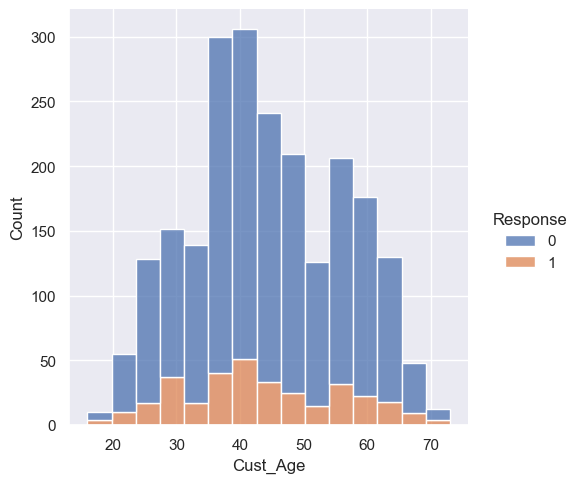

In [65]:
sns.displot(data=df_, x='Cust_Age', hue='Response', multiple='stack', bins=15)
# customer di rentang usia pertengahan 30 - 50 menerima penawaran campaign lebih banyak

In [66]:
np.mean(df_.loc[df_.Response == 1, 'Cust_Age'] )

43.33233532934132

In [67]:
df__corr = df_.corr(method='pearson', numeric_only=True)[['Cust_Age','Response']]
df__corr.loc[['Cust_Age', 'Response'], :]
# korelasi antara umur terhadap variable 'yang menerima penawaran campaign' hampir atau bisa dikatakan tidak ada karena korelasi -0.02 mendekati 0

,Cust_Age,Response
Cust_Age,1.000000,-0.028333
Response,-0.028333,1.000000


In [68]:
import scipy.stats as st

In [69]:
np_resp = df_['Response'].to_numpy()
np_age = df_['Cust_Age'].to_numpy()
st.pointbiserialr(np_resp, np_age)

SignificanceResult(statistic=-0.028332854129393095, pvalue=0.18038288712269077)

### Correlation Education with Response

In [70]:
cats = 0 
for i in df_['Education'].unique():
    cats=cats+1
cats

5

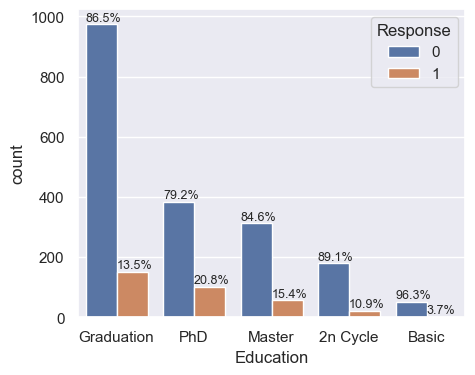

In [71]:
orders = ['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']
hue_order = [0,1]
fig, ax = plt.subplots(figsize=(5,4)) # Create just a figure and only one subplot

ax = sns.countplot(ax=ax, data=df_, x='Education', hue='Response', hue_order=hue_order, order=orders)
n_hues = 2 #hue: response(0, 1)
_bars = [p for p in ax.patches] 
h_bars = [p.get_height() for p in ax.patches]
for i in range(cats):
    total_values = df_['Education'].value_counts().sort_values(ascending=False).values[i]
    for j in range(n_hues):
        percent = '{:.1f}%'.format(100 * h_bars[(j*cats + i)]/total_values)
        x = _bars[(j*cats + i)].get_x() + _bars[(j*cats + i)].get_width() / 2 - 0.2
        y = _bars[(j*cats + i)].get_y() + _bars[(j*cats + i)].get_height() + 10.5
        ax.annotate(percent, (x, y), size = 9)
fig.show()

# Mayoritas data customer pada Ifood merupakan lulusan 'Graduation'
# Mereka yang menerima penawaran campaign Ifood, mayoritas lulusan 'Graduation'

In [72]:
df_['Education'].value_counts().sort_values(ascending=False)

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [73]:
# notes
p_ = [p.get_height() for p in ax.patches]
p_
# first 5: resp 0, last 5: resp 1 [index]
# 0, 1, 2, 3, 4 -> cats
# 0, 1, 2, 3, 4 -> 0-pair-height
# 5, 6, 7, 8, 9 -> 1-pair_height

[975.0, 384.0, 313.0, 179.0, 52.0, 152.0, 101.0, 57.0, 22.0, 2.0]

### Correlation Marital Status with Response

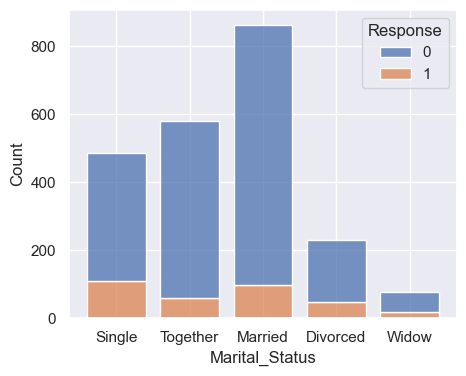

In [74]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(ax=ax, data=df_, x='Marital_Status', hue='Response', multiple='stack', hue_order=hue_order, shrink=0.8)
fig.show()

### Correlation Recency with Response

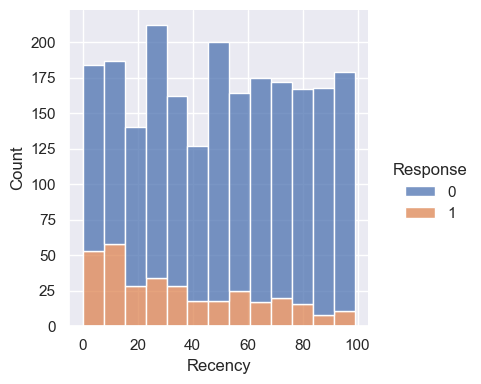

In [75]:
sns.displot(ax=ax, data=df_, x='Recency', hue='Response', multiple='stack', hue_order=hue_order, height=4, aspect=1)
#next: siapa mereka yang melakukan pembelian dengan last purchased 40 hari terakhir 

In [76]:
np_recency = df_['Recency'].to_numpy()
st.pointbiserialr(np_resp, np_recency)

SignificanceResult(statistic=-0.19856777504710288, pvalue=2.519642051437418e-21)

### Correlation Join Date with Response

<Axes: xlabel='Dt_Customer', ylabel='Count'>

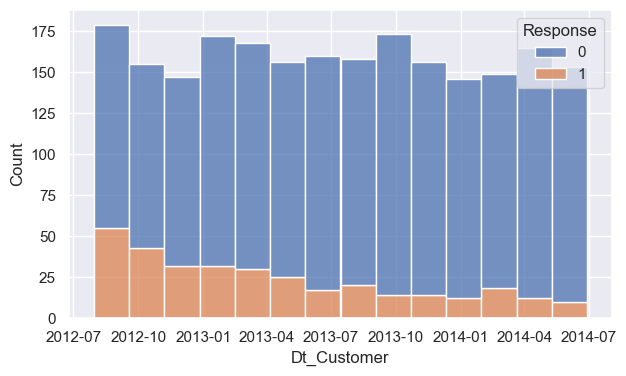

In [77]:
#sns.set(rc={'figure.figsize':(7,4)})
fig, ax = plt.subplots(figsize=(7,4)) # Create just a figure and only one subplot

sns.histplot(ax=ax, data=df_, x='Dt_Customer', hue='Response', multiple='stack')
# 2 tahun terakhir (2012 -2014) yang bergabung dan menerima penawaran campaign mengalami penurunan

In [78]:
print(df_.Dt_Customer.min())
print(df_.Dt_Customer.max())

2012-07-30 00:00:00
2014-06-29 00:00:00


### Correlation Income with Response

<Axes: xlabel='Income'>

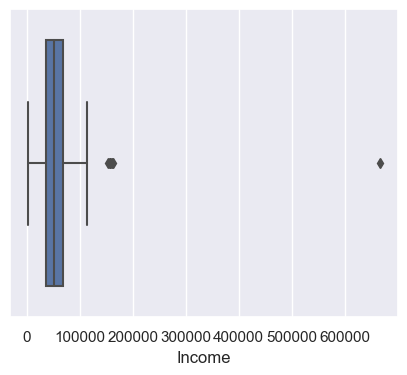

In [79]:
sns.boxplot(data=df_, x='Income')
# Customer yang banyak menerima penawaran merupakan customer yang memiliki income tahunan berada pada kisaran 40k+ 

<Axes: xlabel='Income'>

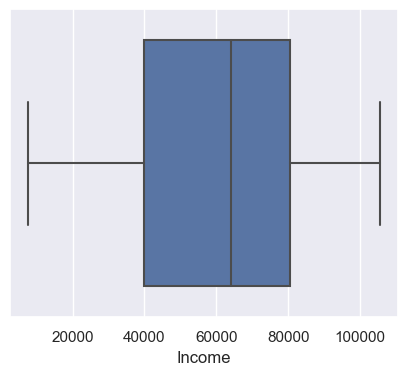

In [80]:
# outlier response = 1 
sns.boxplot(data=df_[df_.Response==1], x='Income')

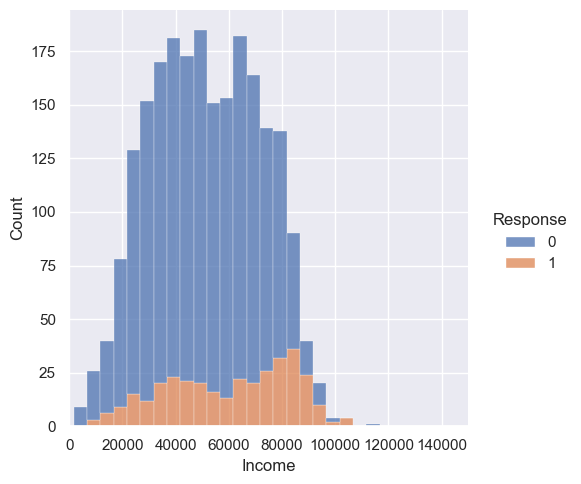

In [81]:
fg = sns.displot(data=df_, x='Income', hue='Response', multiple='stack', hue_order=hue_order)
fg.set(xlim=(0,150000))

In [82]:
np_income = df_.Income.to_numpy()
st.pointbiserialr(np_resp, np_income)

SignificanceResult(statistic=0.13312076067681594, pvalue=2.6015364127449027e-10)

### Correlation Total Children with Response

In [83]:
cols = ['Kidhome', 'Teenhome']
total_child = df_.loc[:][cols].sum(axis=1)

In [84]:
df_['Total_Child'] = total_child

In [85]:
df_.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Total_Amnt_Spent,Cust_Age,Total_Purchased_Items,Total_Child
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,1617,55,25,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,27,60,6,2
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,776,48,21,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,53,30,8,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,422,33,19,1


<Axes: xlabel='Total_Child', ylabel='Count'>

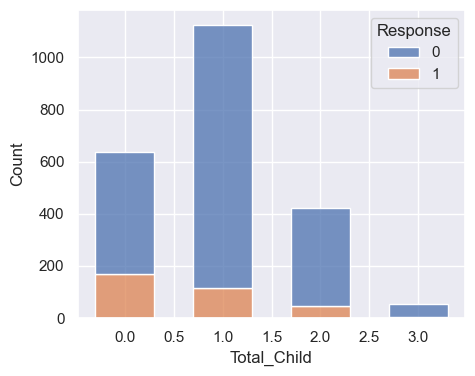

In [86]:
sns.histplot(data=df_, x='Total_Child', hue='Response', multiple='stack', discrete=True, shrink=.6, hue_order=hue_order)
# hypothesis: Buyers yang memiliki sedikit anak cenderung lebih banyak menerima penawaran campaign

In [87]:
np_tot_child = df_['Total_Child'].to_numpy()
st.pointbiserialr(np_resp, np_tot_child)

SignificanceResult(statistic=-0.16945616189508145, pvalue=7.105284641384285e-16)

### Correlation Total Amount Spent with Response

<Axes: xlabel='Count', ylabel='Total_Amnt_Spent'>

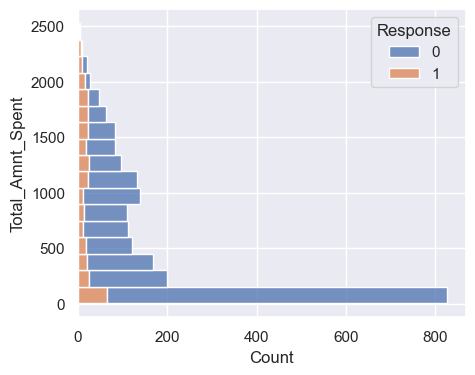

In [88]:
sns.histplot(data=df_, y='Total_Amnt_Spent', hue='Response', multiple='stack', hue_order=hue_order)
# total product yang dibeli customers paling banyak sekitaran 1000-2000 product 

In [89]:
np_tot_amnt = df_['Total_Amnt_Spent'].to_numpy()
st.pointbiserialr(np_resp, np_tot_amnt)

SignificanceResult(statistic=0.26572563785642345, pvalue=1.825997941018947e-37)

### Correlation NumWebVisitsMonth with Response

In [90]:
np_web_visits = df_['NumWebVisitsMonth'].to_numpy()
st.pointbiserialr(np_resp, np_web_visits)
# Banyak jumlah web dikunjungi tidak ada korelasi dengan response

SignificanceResult(statistic=-0.004449481523440198, pvalue=0.8334099256235221)

## Data Insight II

In [91]:
from matplotlib.patches import ConnectionPatch

In [92]:
tot_item_wdisc = df_.NumDealsPurchases.sum()
tot_item_wcatalog = df_.NumCatalogPurchases.sum()
tot_item_wdirstore = df_.NumStorePurchases.sum()
tot_item_wweb = df_.NumWebPurchases.sum()
sum_tot_items = df_.Total_Purchased_Items.sum()

print(tot_item_wdisc, tot_item_wcatalog, tot_item_wdirstore, tot_item_wweb)
print(sum_tot_items)

5205 5956 12962 9143
33266


### Who's the buyers

In [93]:
df_buyers = df_[:][:].copy()

#### Recency

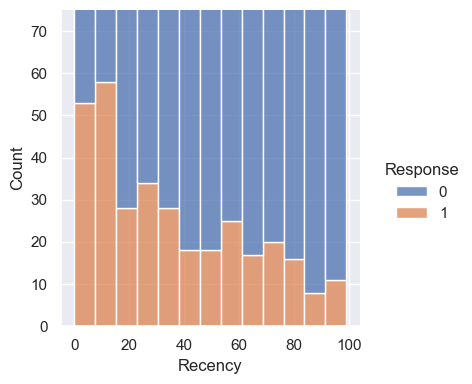

In [94]:
ax = sns.displot(data=df_buyers, x='Recency', hue='Response', multiple='stack', hue_order=hue_order, height=4, aspect=1)
ax.set(ylim=(0, 75))

In [95]:
r1 = 0.25*df_buyers.Recency.max()
r2 = 0.5*df_buyers.Recency.max()
r3 = 0.75*df_buyers.Recency.max()
r4 = df_buyers.Recency.max()
print(r1,r2,r3,r4)

24.75 49.5 74.25 99


In [96]:
def percent_calc(df_r_quarter, index):
    if index != 0:
        return ((df_r_quarter.total_cust[index] - df_r_quarter.total_cust[index-1])/df_r_quarter.total_cust[index-1])*100
    else:
        return 100

In [97]:
r_25 = df_buyers.loc[(df_buyers.Response == 1)&(df_buyers.Recency <= r1)].Recency.count()
r_50 = df_buyers.loc[(df_buyers.Response == 1)&(df_buyers.Recency > r1)&(df_buyers.Recency <= r2)].Recency.count()
r_75 = df_buyers.loc[(df_buyers.Response == 1)&(df_buyers.Recency > r2)&(df_buyers.Recency <= r3)].Recency.count()
r_100 = df_buyers.loc[(df_buyers.Response == 1)&(df_buyers.Recency > r3)&(df_buyers.Recency <= r4)].Recency.count()

r_data = {
    'recency_days': ('25%', '50%', '75%', '100%'),
    'total_cust': (r_25, r_50, r_75, r_100)
}
df_r_quarter = pd.DataFrame(r_data)
df_r_quarter['index'] = df_r_quarter.apply(lambda row: row.name, axis=1)
df_r_quarter['percentage_growth(%)'] = df_r_quarter.index.to_series().apply(lambda index: percent_calc(df_r_quarter=df_r_quarter, index=index))
df_r_quarter

,recency_days,total_cust,index,percentage_growth(%)
0,25%,150,0,100.000000
1,50%,79,1,-47.333333
2,75%,64,2,-18.987342
3,100%,41,3,-35.937500


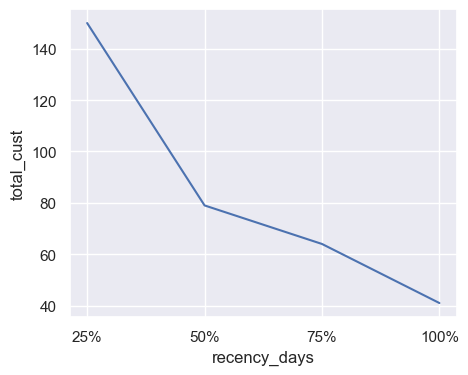

In [98]:
ax = sns.lineplot(data=df_r_quarter, x='recency_days', y='total_cust')

#### Average Ages Across Different Education Levels

In [99]:
df_buyers_grad_1 = df_buyers.loc[(df_buyers['Education'] == 'Graduation') & (df_buyers['Response'] == 1)]
df_buyers_phd_1 = df_buyers.loc[(df_buyers['Education'] == 'PhD') & (df_buyers['Response'] == 1)]
df_buyers_master_1 = df_buyers.loc[(df_buyers['Education'] == 'Master') & (df_buyers['Response'] == 1)]
df_buyers_basic_1 = df_buyers.loc[(df_buyers['Education'] == 'Basic') & (df_buyers['Response'] == 1)]
df_buyers_2n_1 = df_buyers.loc[(df_buyers['Education'] == '2n Cycle') & (df_buyers['Response'] == 1)]

print(df_buyers_grad_1.Cust_Age.mean(), df_buyers_phd_1.Cust_Age.mean(), 
      df_buyers_master_1.Cust_Age.mean(), df_buyers_basic_1.Cust_Age.mean(),
     df_buyers_2n_1.Cust_Age.mean())

42.60526315789474 45.0 43.96491228070175 39.5 39.40909090909091


In [100]:
# error bar
bars = {
    "CTE": (
        np.mean(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'Graduation')].Cust_Age),
        np.mean(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'PhD')].Cust_Age),
        np.mean(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'Master')].Cust_Age),
        np.mean(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'Basic')].Cust_Age),
        np.mean(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == '2n Cycle')].Cust_Age)
    ),
    "STD" : (
        np.std(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'Graduation')].Cust_Age),
        np.std(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'PhD')].Cust_Age),
        np.std(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'Master')].Cust_Age),
        np.std(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == 'Basic')].Cust_Age),
        np.std(df_buyers.loc[(df_buyers.Response == 1) & (df_buyers.Education == '2n Cycle')].Cust_Age)
    )   
}
bars

{'CTE': (42.60526315789474, 45.0, 43.96491228070175, 39.5, 39.40909090909091),
 'STD': (12.069512425690855,
  12.174474189145839,
  12.987125760483769,
  0.5,
  12.701678811405174)}

In [ ]:
bars_names = ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
x = np.arange(len(bars_names))

fig, ax = plt.subplots(figsize=(5,5))
c = plt.bar(x, bars['CTE'], color='orange')
plt.errorbar(bars_names, bars['CTE'], yerr=bars['STD'], fmt='o', color='black')
plt.title('Error bars of The Correlation between Education and Age when Response = 1', fontdict={'fontsize':10})
plt.legend(bars)
plt.show()

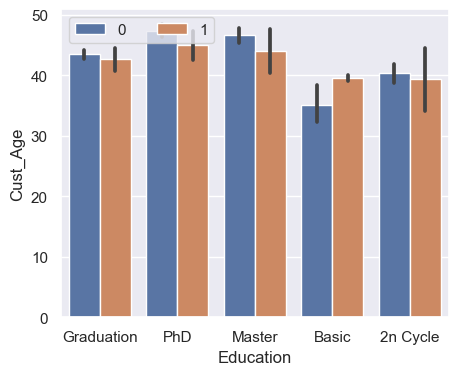

In [102]:
import sys
try:
    ax = sns.barplot(data=df_buyers, x='Education', y='Cust_Age', hue='Response', hue_order=hue_order)
    ax.legend(loc='upper left', ncols=2)
    #raise AttributeError
except AttributeError as e:
    e_type, e_object, e_traceback = sys.exc_info()
    e_filename = os.path.split(
        e_traceback.tb_frame.f_code.co_filename
    )[1]

    e_message = str(e)
    e_line_number = e_traceback.tb_lineno
    print(f'exception type: {e_type}')
    print(f'exception filename: {e_filename}')
    print(f'exception line number: {e_line_number}')
    print(f'exception message: {e_message}')

In [103]:
print(df_buyers.Cust_Age.astype(int).min(), df_buyers.Cust_Age.astype(int).max())

16 73


In [104]:
tot_data = df_buyers.shape[0]
tot_data_1 = df_buyers[:][df_buyers.Response == 1].shape[0]

_age = ['Under 20', '21-35', '36-50', 'Over 50']
bar_data_age_grad = [
    df_buyers.loc[(df_buyers['Cust_Age'].astype(int) < 21) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count(),
    df_buyers.loc[(df_buyers['Cust_Age'].astype(int) > 20) & (df_buyers['Cust_Age'] < 36) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count(),
    df_buyers.loc[(df_buyers['Cust_Age'].astype(int) > 35) & (df_buyers['Cust_Age'] < 51) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count(),
    df_buyers.loc[(df_buyers['Cust_Age'].astype(int) > 50) & (df_buyers['Education'] == 'Graduation') & (df_buyers['Response']==1)].Cust_Age.count()
]
bar_data_age_grad

[3, 43, 63, 43]

In [105]:
_edu = []
for u in df_buyers.Education.unique():
    _edu.append(u)
# >>> ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

df_buyers_edu = df_buyers[df_buyers['Response']==1].Education.value_counts()
data_edu = [
    df_buyers_edu['Graduation'],
    df_buyers_edu['PhD'],
    df_buyers_edu['Master'],
    df_buyers_edu['Basic'],
    df_buyers_edu['2n Cycle'],
]
data_edu

[152, 101, 57, 2, 22]

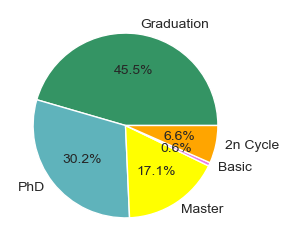

In [106]:
edu_chart_percentage = [float(x) for x in ([
    '{:.1f}'.format((data_edu[0]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[1]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[2]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[3]/tot_data_1)*100),
    '{:.1f}'.format((data_edu[4]/tot_data_1)*100),
])]

fig, ax = plt.subplots(figsize=(4,3))
ax.pie(edu_chart_percentage, autopct='%1.1f%%', labels=_edu, colors=['#349464','#5FB3BB','yellow','#E77BE5','orange'], textprops={'size':10}) 
fig.show()

In [107]:
age_chart_percentage_grad = [float(x) for x in([
    '{:.1f}'.format((bar_data_age_grad[0]/tot_data_1)*100),
    '{:.1f}'.format((bar_data_age_grad[1]/tot_data_1)*100),
    '{:.1f}'.format((bar_data_age_grad[2]/tot_data_1)*100),
    '{:.1f}'.format((bar_data_age_grad[3]/tot_data_1)*100),
])]
age_chart_percentage_grad

[0.9, 12.9, 18.9, 12.9]

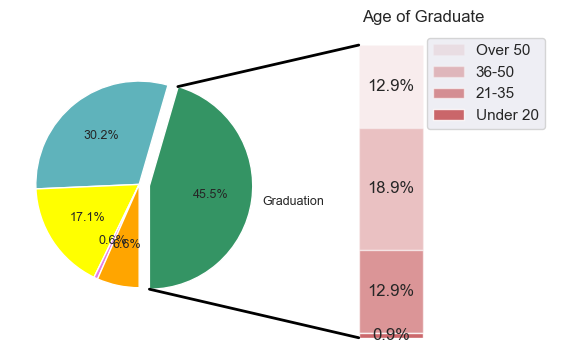

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,4))
fig.subplots_adjust(wspace=0.1)

wedges, *_  = ax1.pie(edu_chart_percentage, autopct='%1.1f%%', labels=['Graduation', '', '', '', ''], explode=[.1,0,0,0,0], startangle=270,
        colors=['#349464','#5FB3BB','yellow','#E77BE5','orange'], textprops={'size':9}) 

w = .2
b = 1
for j, (h, label) in enumerate(reversed([*zip(age_chart_percentage_grad,_age)])):
    b -= h
    barContainer = ax2.bar(0, height=h, width=w, bottom=b, color='C3', label=label, alpha=0.1+0.25 * j)
    ax2.bar_label(barContainer, labels=[f'{h}%'], label_type='center')

ax2.set_title('Age of Graduate')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-1.5*w, 2.5*w)

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_chart_percentage_grad)

# draw top connecting line
x = r * np.cos(np.pi / 323 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-w / 2, 1), coordsA=ax2.transData,
                      xyB=(-x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 20 * theta1) + center[0]
y = r * np.sin(np.pi / 20 * theta1) + center[1]
con = ConnectionPatch(xyA=(-w / 2, -44.5), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

fig.show()

In [109]:
select_cols = ['Cust_Age', 'Education', 'Income', 'Response']
df_buyers_ = df_buyers[:][select_cols]

In [110]:
df_buyers_1 = df_buyers_[df_buyers_['Response']==1]

In [111]:
df_buyers_1.head(5)

,Cust_Age,Education,Income,Response
0,55,Graduation,58138.0,1
8,39,PhD,30351.0,1
15,66,PhD,82800.0,1
33,60,PhD,46610.0,1
39,70,PhD,48948.0,1


In [112]:
df_under_20_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age < 21) & (df_buyers_1.Education=='Graduation')]
df_21_35_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age > 20 ) & (df_buyers_1.Cust_Age < 36) & (df_buyers_1.Education=='Graduation')]
df_36_50_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age > 35 ) & (df_buyers_1.Cust_Age < 51) & (df_buyers_1.Education=='Graduation')]
df_over_50_grad = df_buyers_1.loc[(df_buyers_1.Cust_Age > 50 ) & (df_buyers_1.Education=='Graduation')]

In [113]:
mean_items = {
    'Income(mean)':(df_under_20_grad.Income.mean(), df_21_35_grad.Income.mean(), df_36_50_grad.Income.mean(), df_over_50_grad.Income.mean()),
    'Age':_age,
    'Total': (len(df_under_20_grad), len(df_21_35_grad), len(df_36_50_grad), len(df_over_50_grad))
}

dx = pd.DataFrame(mean_items)
dx

,Income(mean),Age,Total
0,81762.666667,Under 20,3
1,54269.651163,21-35,43
2,58603.190476,36-50,63
3,69512.232558,Over 50,43


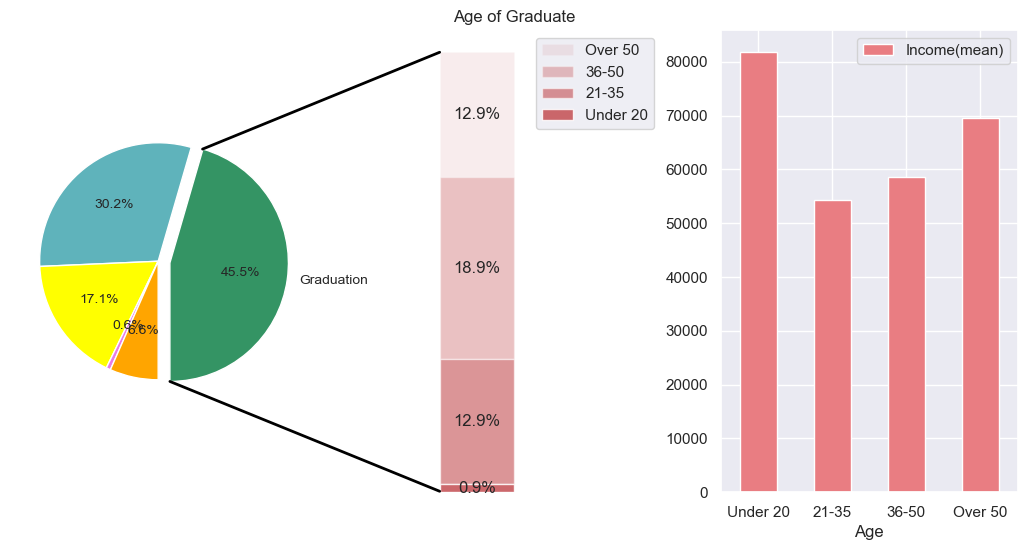

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,6))
fig.subplots_adjust(wspace=0.2)

wedges, *_  = ax1.pie(edu_chart_percentage, autopct='%1.1f%%', labels=['Graduation', '', '', '', ''], explode=[.1,0,0,0,0], startangle=270,
        colors=['#349464','#5FB3BB','yellow','#E77BE5','orange'], textprops={'size':10}) 

w = .2
b = 1
for j, (h, label) in enumerate(reversed([*zip(age_chart_percentage_grad,_age)])):
    b -= h
    barContainer = ax2.bar(0, height=h, width=w, bottom=b, color='C3', label=label, alpha=0.1+0.25 * j)
    ax2.bar_label(barContainer, labels=[f'{h}%'], label_type='center')

ax2.set_title('Age of Graduate')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(-1.5*w, 2.5*w)

dx.plot.bar(ax=ax3, x='Age', y='Income(mean)', rot=0, color='#E97D82')

theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_chart_percentage_grad)

# draw top connecting line
x = r * np.cos(np.pi / 323 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-w / 2, 1), coordsA=ax2.transData,
                      xyB=(-x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 20 * theta1) + center[0]
y = r * np.sin(np.pi / 20 * theta1) + center[1]
con = ConnectionPatch(xyA=(-w / 2, -44.5), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

fig.show()

#### Average Income 

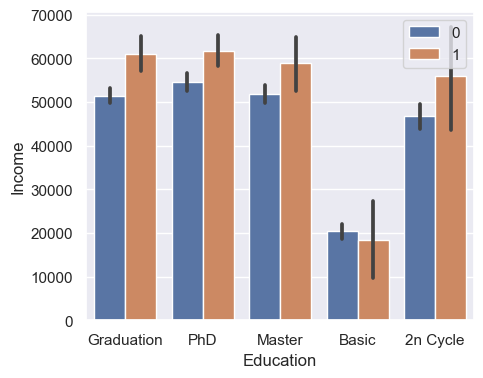

In [115]:
global ax_, fig
try:
    fig, ax_ = plt.subplots(figsize=(5,4))
    ax_ = sns.barplot(data=df_buyers, x='Education', y='Income', hue='Response', hue_order=hue_order)
except AttributeError as e:
    print(e)
finally:
    ax_.legend()
    fig.show()

# rata income customer pertahun yang menerima penawaran campaign

In [116]:
df_buyers_1.Income.mean()

60183.24401197605

### Purchases Made

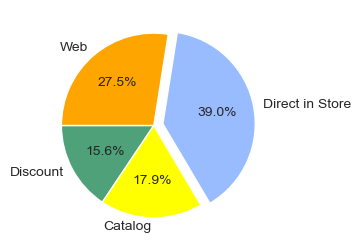

In [117]:
fig, ax1 = plt.subplots(figsize=(5,3))

chart_percentage = [float(x) for x in ([
    '{:.1f}'.format((tot_item_wdisc/sum_tot_items)*100),
    '{:.1f}'.format((tot_item_wcatalog/sum_tot_items)*100),
    '{:.1f}'.format((tot_item_wdirstore/sum_tot_items)*100),
    '{:.1f}'.format((tot_item_wweb/sum_tot_items)*100)
])]

labels = ['Discount', 'Catalog', 'Direct in Store', 'Web']
explode = [0, 0, 0.1, 0]
angle = 60 * chart_percentage[2]
wedges, *_ = ax1.pie(chart_percentage, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['#4EA178','yellow','#99bbff','orange'], textprops={'size': 10})

fig.show()


In [118]:
df_purch_dis = df_[df_.NumDealsPurchases != 0]
df_purch_cat = df_[df_.NumCatalogPurchases != 0]
df_purch_web = df_[df_.NumWebPurchases != 0]
df_purch_store = df_[df_.NumStorePurchases != 0]

In [119]:
mean_purch_age = [df_purch_dis.Cust_Age.mean(), df_purch_cat.Cust_Age.mean(), df_purch_web.Cust_Age.mean(), df_purch_store.Cust_Age.mean()]
line_age = {
    'Label':['Discount','Catalog','Website','Direct In Store'],
    'Age(mean)':mean_purch_age,
}
pd.DataFrame(line_age)

,Label,Age(mean)
0,Discount,44.090370
1,Catalog,45.350484
2,Website,44.168647
3,Direct In Store,44.127363


#### Purchases Made by Only Customer that Accepts the Campaign

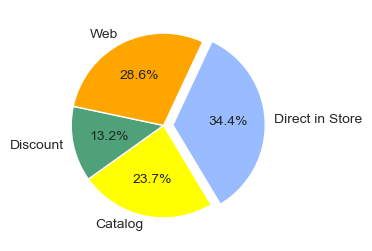

In [120]:
fig, ax1 = plt.subplots(figsize=(5,3))

sum_tot_items_1 = df_[df_.Response == 1].Total_Purchased_Items.sum()
chart_percentage_1 = [float(x) for x in ([
    '{:.1f}'.format((df_[df_.Response == 1].NumDealsPurchases.sum()/sum_tot_items_1)*100),
    '{:.1f}'.format((df_[df_.Response == 1].NumCatalogPurchases.sum()/sum_tot_items_1)*100),
    '{:.1f}'.format((df_[df_.Response == 1].NumStorePurchases.sum()/sum_tot_items_1)*100),
    '{:.1f}'.format((df_[df_.Response == 1].NumWebPurchases.sum()/sum_tot_items_1)*100)
])]

labels = ['Discount', 'Catalog', 'Direct in Store', 'Web']
explode = [0, 0, 0.1, 0]
angle = 120 * chart_percentage_1[2]
wedges, *_ = ax1.pie(chart_percentage_1, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['#4EA178','yellow','#99bbff','orange'], textprops={'size': 10})

fig.show()

In [121]:
df_purch_dis_1 = df_.loc[(df_.NumDealsPurchases != 0) & (df_.Response == 1)]
df_purch_cat_1 = df_.loc[(df_.NumCatalogPurchases != 0) & (df_.Response == 1)]
df_purch_web_1 = df_.loc[(df_.NumWebPurchases != 0) & (df_.Response == 1)]
df_purch_store_1 = df_.loc[(df_.NumStorePurchases != 0) & (df_.Response == 1)]

In [122]:
mean_purch_age_1 = [df_purch_dis_1.Cust_Age.mean(), df_purch_cat_1.Cust_Age.mean(), df_purch_web_1.Cust_Age.mean(), df_purch_store_1.Cust_Age.mean()]
line_age = {
    'Label':['Discount','Catalog','Website','Direct In Store'],
    'Age(mean)':mean_purch_age_1,
}
pd.DataFrame(line_age)

,Label,Age(mean)
0,Discount,43.289308
1,Catalog,43.631410
2,Website,43.378378
3,Direct In Store,43.332335


### Previous Campaign

In [123]:
df_buyers.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Total_Amnt_Spent', 'Cust_Age',
       'Total_Purchased_Items', 'Total_Child'],
      dtype='object')

In [124]:
prev_campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_buyers[:][prev_campaign].tail(5) # 1: accept; 0: otherwise

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
2235,0,0,0,0,0
2236,1,0,0,0,0
2237,0,0,0,1,0
2238,0,0,0,0,0
2239,0,0,0,0,0


In [125]:
np_camp_1 = df_buyers['AcceptedCmp1'].to_numpy() 
np_camp_2 = df_buyers['AcceptedCmp2'].to_numpy()
np_camp_3 = df_buyers['AcceptedCmp3'].to_numpy()
np_camp_4 = df_buyers['AcceptedCmp4'].to_numpy()
np_camp_5 = df_buyers['AcceptedCmp5'].to_numpy()

pt_camp_1 = st.pointbiserialr(np_resp, np_camp_1)
pt_camp_2 = st.pointbiserialr(np_resp, np_camp_2)
pt_camp_3 = st.pointbiserialr(np_resp, np_camp_3)
pt_camp_4 = st.pointbiserialr(np_resp, np_camp_4)
pt_camp_5 = st.pointbiserialr(np_resp, np_camp_5)

data = {
    'Campaign': ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5'],
    'Corr':[pt_camp_1[0], pt_camp_2[0], pt_camp_3[0], pt_camp_4[0], pt_camp_5[0]],
    'PVal':[pt_camp_1[1], pt_camp_2[1], pt_camp_3[1], pt_camp_4[1], pt_camp_5[1] ]
}
pd.DataFrame(data).sort_values(by='Corr', ascending=False)

,Campaign,Corr,PVal
4,Campaign 5,0.328182,2.532524e-57
0,Campaign 1,0.293882,8.309339e-46
2,Campaign 3,0.254144,2.597240e-34
3,Campaign 4,0.176890,3.510116e-17
1,Campaign 2,0.169249,7.712782e-16


#### Number of data buyers accepting the campaign period in the latest campaign

In [126]:
np_camp_1_latest = df_buyers.loc[df_buyers.Response == 1, 'AcceptedCmp1'].to_numpy()
np_camp_2_latest = df_buyers.loc[df_buyers.Response == 1, 'AcceptedCmp2'].to_numpy()
np_camp_3_latest = df_buyers.loc[df_buyers.Response == 1, 'AcceptedCmp3'].to_numpy()
np_camp_4_latest = df_buyers.loc[df_buyers.Response == 1, 'AcceptedCmp4'].to_numpy()
np_camp_5_latest = df_buyers.loc[df_buyers.Response == 1, 'AcceptedCmp5'].to_numpy()

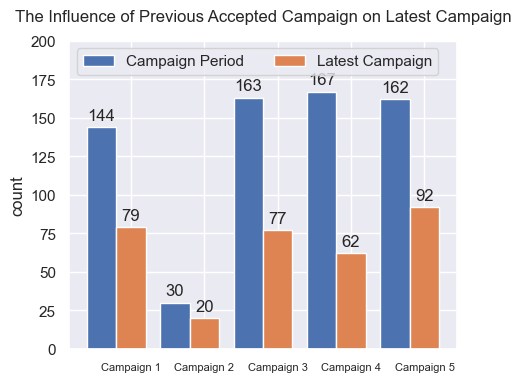

In [127]:
campaign = ('Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5')
campaign_ = {
    "Campaign Period": (len([x for x in np_camp_1 if x == 1]), len([x for x in np_camp_2 if x == 1]), len([x for x in np_camp_3 if x == 1]),
    len([x for x in np_camp_4 if x == 1]), len([x for x in np_camp_5 if x == 1])),
    "Latest Campaign": (len([y for y in np_camp_1_latest if y == 1]), len([y for y in np_camp_2_latest if y == 1]), len([y for y in np_camp_3_latest if y == 1]),
    len([y for y in np_camp_4_latest if y == 1]), len([y for y in np_camp_5_latest if y == 1]))
}
barw = 0.4
x = np.arange(len(campaign))
m = 0

fig, ax = plt.subplots()
for key, v in campaign_.items() :
    o = barw*m
    rects = ax.bar(o+x, v, barw, label=key)
    ax.bar_label(rects, padding=3)
    m = m+1

ax.set_ylabel('count')
ax.set_ylim(0, 200)
ax.set_xticks(x + barw, campaign, fontsize=8)
ax.legend(loc='upper left', ncol=2)
ax.set_title('The Influence of Previous Accepted Campaign on Latest Campaign', pad=14)

plt.show()

#### Correlation Age with Previous Campaign

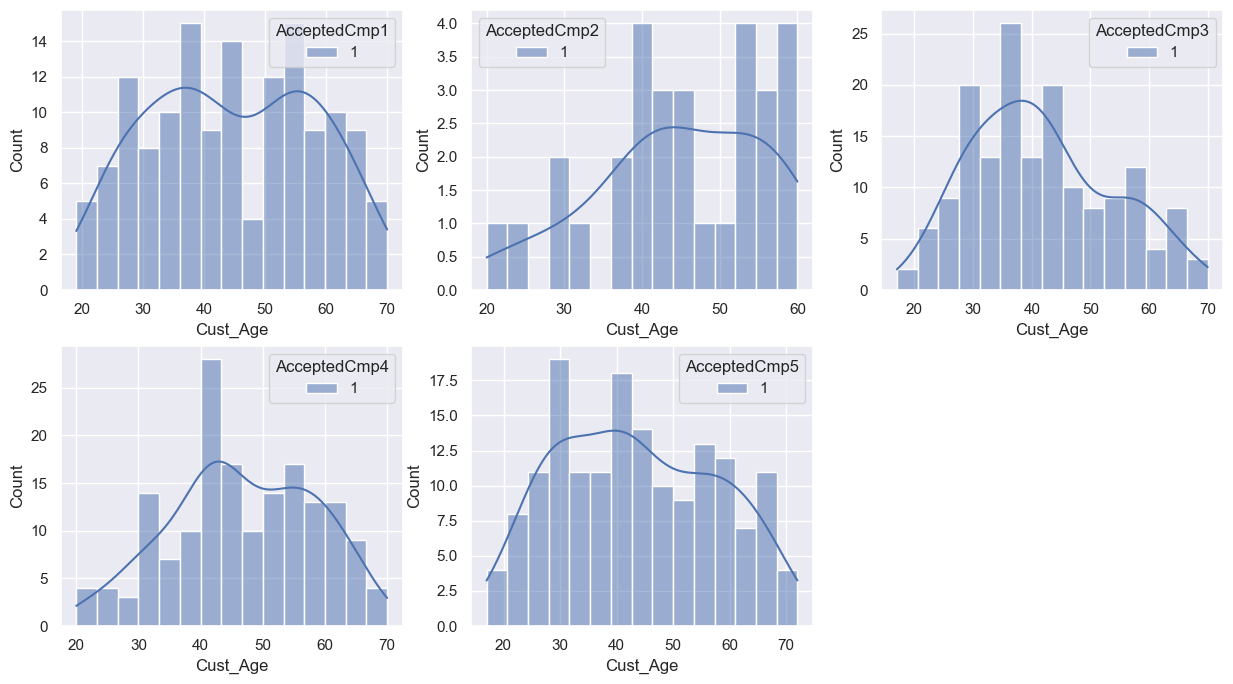

In [128]:
k = 0
fig = plt.figure(figsize=(15, 8))
for i in prev_campaign:
    k += 1
    axes = fig.add_subplot(2, 3, k)
    axes = sns.histplot( data=df_buyers[df_buyers[i]==1], x='Cust_Age', hue=i, kde=True, bins=15)
    # axes.annotate("Response 1 \nMean = {:.1f}, \nStd = {:.1f}".format(np.mean(df_buyers[df_buyers[i]==1].Cust_Age), np.std(df_buyers[df_buyers[i]==1].Cust_Age)),
    # xy=(15,axes.patches), fontsize=9)


plt.show()


### Product Sales

In [129]:
products = [p for p in df_buyers.columns if 'Mnt' in str(p)]

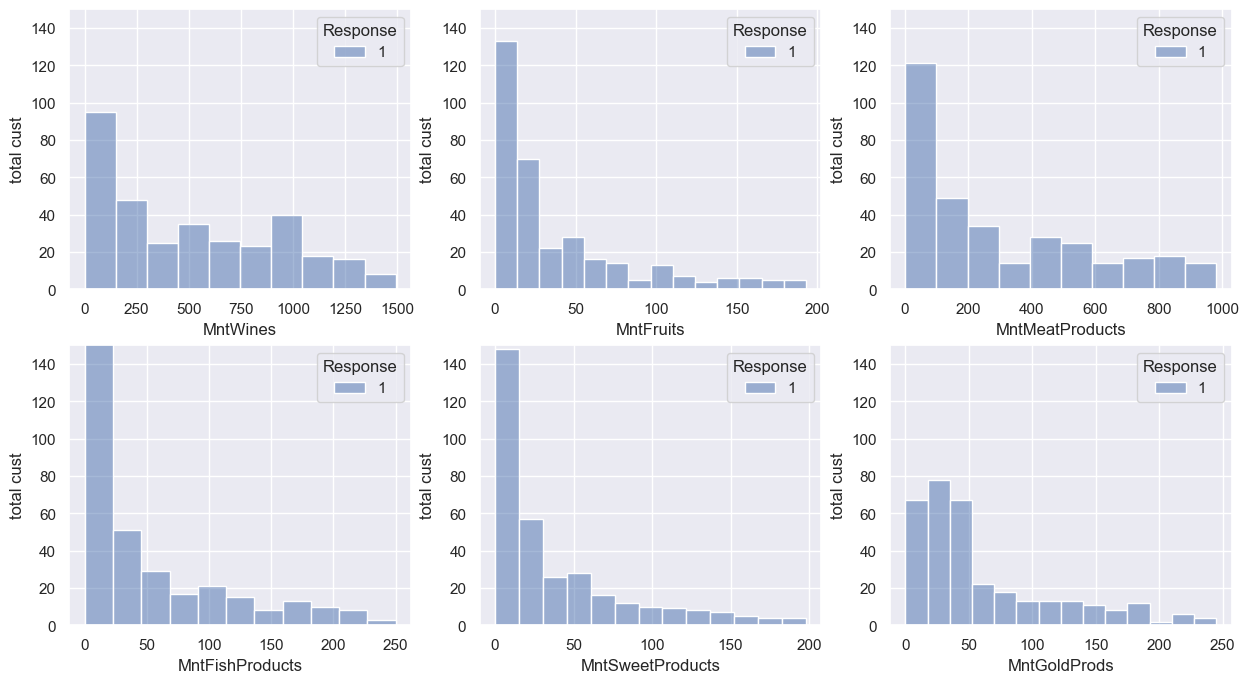

In [130]:
i = 0
fig = plt.figure(figsize=(15,8))
for j in range(len(products)):
    i += 1

    fig.add_subplot(2, 3, i)
    ax = sns.histplot(data=df_buyers[df_buyers['Response']==1], x=products[j], hue='Response')
    ax.set(ylim=(0,150))
    ax.set_ylabel('total cust')
plt.show()

In [131]:
sales = {
    "Wines":  df_buyers.loc[ (df_buyers['Response']==1) & (df_buyers.MntWines > 0) ].MntWines.sum(),
    "Fruits":  df_buyers.loc[ (df_buyers['Response']==1) & (df_buyers.MntFruits > 0) ].MntFruits.sum(),
    "Meat":  df_buyers.loc[ (df_buyers['Response']==1) & (df_buyers.MntMeatProducts > 0) ].MntMeatProducts.sum(),
    "Fish":  df_buyers.loc[ (df_buyers['Response']==1) & (df_buyers.MntFishProducts > 0) ].MntFishProducts.sum(),
    "Sweet":  df_buyers.loc[ (df_buyers['Response']==1) & (df_buyers.MntSweetProducts > 0) ].MntSweetProducts.sum(),
    "Gold":  df_buyers.loc[ (df_buyers['Response']==1) & (df_buyers.MntGoldProds > 0) ].MntMeatProducts.sum()
}

sales_df = pd.DataFrame(sales, index=['Sales'])
sales_df['Total_Products'] = sales_df.sum(axis=0).sum()

percentage = {
    "Wines":  (sales["Wines"]/sales_df.Total_Products.Sales)*100,
    "Fruits": (sales["Fruits"]/sales_df.Total_Products.Sales)*100,
    "Meat":  (sales["Meat"]/sales_df.Total_Products.Sales)*100,
    "Fish":  (sales["Fish"]/sales_df.Total_Products.Sales)*100,
    "Sweet": (sales["Sweet"]/sales_df.Total_Products.Sales)*100,
    "Gold":  (sales["Gold"]/sales_df.Total_Products.Sales)*100,
    "Total_Products" : 100
}
sales_df = pd.concat([sales_df, pd.DataFrame(percentage, index=['Percentage(%)']).round(2)] )
sales_df

,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Products
Sales,167903.00,12760.00,98314.00,17385.0,12904.0,94599.00,403865
Percentage(%),41.57,3.16,24.34,4.3,3.2,23.42,100


[(0.0, 45.0)]

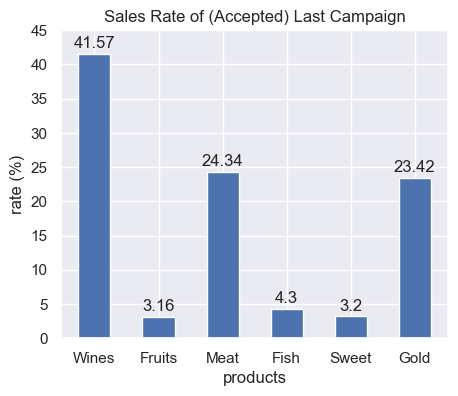

In [132]:
sales_df_ = sales_df.loc[:, sales_df.columns!='Total_Products']
fig, ax = plt.subplots(figsize=(5,4))
# for col in sales_df.columns:
rects = ax.bar(data=sales_df_, x=sales_df_.columns, height=sales_df_.loc['Percentage(%)'], width=.5)
ax.bar_label(rects, padding=2)
ax.set_ylabel('rate (%)')
ax.set_xlabel('products')
ax.set_title('Sales Rate of (Accepted) Last Campaign')
ax.set(ylim=(0, 45))

##### Product Sales on Previous Campaign

In [133]:
label = [label for label in df_buyers.columns if 'Accepted' in str(label)]
headers = ['Sales', 'Prop_Rate']
dicts_items = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
dicts_items_df = [p for p in df_buyers.columns if 'Mnt' in str(label)]
sales_items = ()

sales_prods_dict = {}
sales_prods_tup = {}

sales_rate_dict = {}
sales_rate_tup = {}

df__ = pd.DataFrame()
df_sales = pd.DataFrame()
df_rate = pd.DataFrame()
for items in label:
    sales_items += (items,)

    sales_prods_tup = list(sales_prods_tup)
    sales_prods_dict = {
        "Wines":  df_buyers.loc[ (df_buyers[items]==1) & (df_buyers.MntWines > 0) ].MntWines.sum(),
        "Fruits":  df_buyers.loc[ (df_buyers[items]==1) & (df_buyers.MntFruits > 0) ].MntFruits.sum(),
        "Meat":  df_buyers.loc[ (df_buyers[items]==1) & (df_buyers.MntMeatProducts > 0) ].MntMeatProducts.sum(),
        "Fish":  df_buyers.loc[ (df_buyers[items]==1) & (df_buyers.MntFishProducts > 0) ].MntFishProducts.sum(),
        "Sweet":  df_buyers.loc[ (df_buyers[items]==1) & (df_buyers.MntSweetProducts > 0) ].MntSweetProducts.sum(),
        "Gold":  df_buyers.loc[ (df_buyers[items]==1) & (df_buyers.MntGoldProds > 0) ].MntMeatProducts.sum()
    }
    sales_prods_tup.append(sales_prods_dict)
    sales_prods_tup = tuple(sales_prods_tup)

    # Append to DataFrame Sales
    sales_prods_ = pd.DataFrame(sales_prods_dict, index=[items])
    df_sales = pd.concat([df_sales, sales_prods_], axis=0)

    sales_prods_df = pd.DataFrame(sales_prods_dict, index=['Sales'])
    sales_prods_df['Total_Products'] = sales_prods_df.sum(axis=0).sum()

    sales_rate_tup = list(sales_rate_tup)
    sales_rate_dict = {
        "Wines":  (sales_prods_dict["Wines"]/sales_prods_df.Total_Products.Sales)*100,
        "Fruits": (sales_prods_dict["Fruits"]/sales_prods_df.Total_Products.Sales)*100,
        "Meat":  (sales_prods_dict["Meat"]/sales_prods_df.Total_Products.Sales)*100,
        "Fish":  (sales_prods_dict["Fish"]/sales_prods_df.Total_Products.Sales)*100,
        "Sweet": (sales_prods_dict["Sweet"]/sales_prods_df.Total_Products.Sales)*100,
        "Gold":  (sales_prods_dict["Gold"]/sales_prods_df.Total_Products.Sales)*100
    }
    sales_rate_tup.append(sales_rate_dict)
    sales_rate_tup = tuple(sales_rate_tup)

    # Append to DataFrame Rate
    sales_rate_ = pd.DataFrame(sales_rate_dict, index=[items])
    df_rate = pd.concat([df_rate, sales_rate_], axis=0)

df__ = pd.concat([df_sales, df_rate], axis=1, keys=headers)
df__

Sales                                     Prop_Rate            \
               Wines Fruits   Meat   Fish  Sweet   Gold      Wines    Fruits   
AcceptedCmp3   61721   4628  29612   6128   4448  29612  45.333421  3.399217   
AcceptedCmp4  124669   4630  41545   6808   5215  38671  56.274319  2.089935   
AcceptedCmp5  141327   9137  75728  12355  10581  71568  44.068838  2.849116   
AcceptedCmp1  109239   8042  62444  13228   9380  59329  41.748133  3.073431   
AcceptedCmp2   26960    689   7509   1162    918   7113  60.787806  1.553516   

                                                        
                   Meat      Fish     Sweet       Gold  
AcceptedCmp3  21.749701  4.500951  3.267009  21.749701  
AcceptedCmp4  18.752990  3.073062  2.353998  17.455696  
AcceptedCmp5  23.613640  3.852558  3.299386  22.316462  
AcceptedCmp1  23.864375  5.055377  3.584777  22.673908  
AcceptedCmp2  16.930847  2.620009  2.069852  16.037970

In [134]:
df__index = pd.DataFrame(df__.Prop_Rate.round(1), index=df__.index)

In [170]:
df__index.head(5)

,Wines,Fruits,Meat,Fish,Sweet,Gold
AcceptedCmp3,45.3,3.4,21.7,4.5,3.3,21.7
AcceptedCmp4,56.3,2.1,18.8,3.1,2.4,17.5
AcceptedCmp5,44.1,2.8,23.6,3.9,3.3,22.3
AcceptedCmp1,41.7,3.1,23.9,5.1,3.6,22.7
AcceptedCmp2,60.8,1.6,16.9,2.6,2.1,16.0


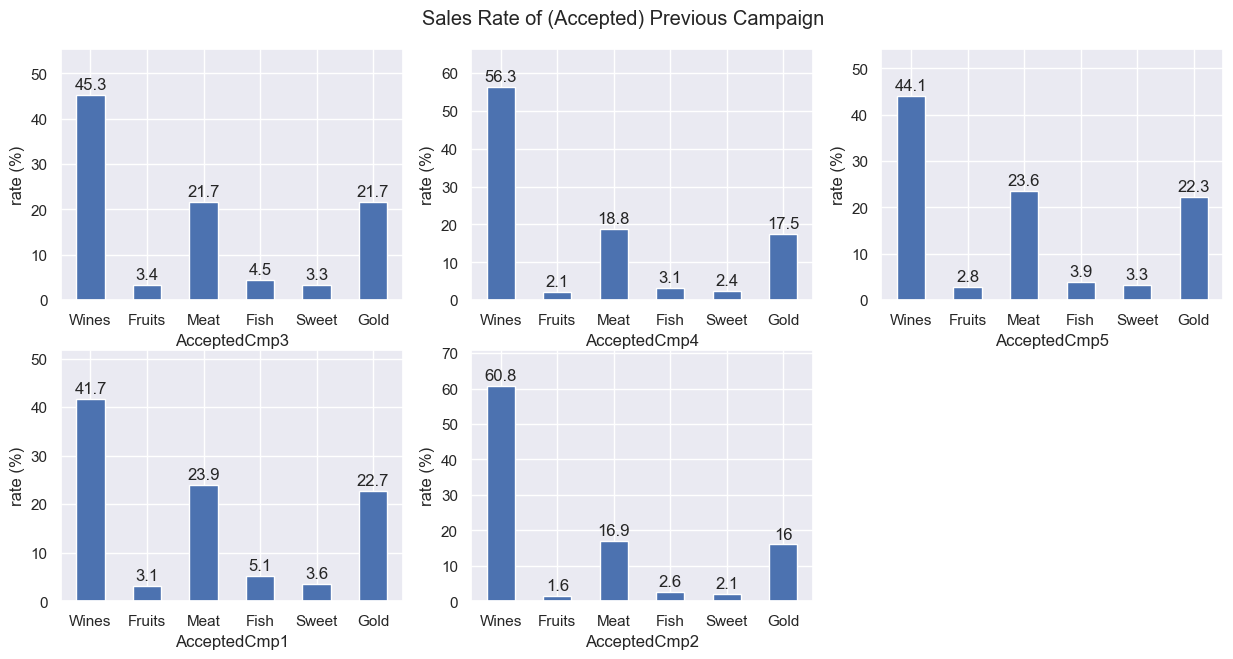

In [135]:
k = 0
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(top=0.8)
for index, row in df__index.iterrows():
    k+=1
    ax = fig.add_subplot(2, 3, k)
    rects = ax.bar(row.index, row.values, width=0.5)
    ax.bar_label(rects, padding=2)
    ax.set_ylabel('rate (%)')
    ax.set_xlabel(index)
    ax.set(ylim=(0, row.values.max() + 10))

fig.suptitle('Sales Rate of (Accepted) Previous Campaign', y=0.85)
fig.show()

## Modelling

#### Logistic Regression
Logistic Regression is a supervised classification model.

In [136]:
y_train = df_train_temp.Response
y_test = df_test_temp.Response
y_valid = df_valid_temp.Response

In [137]:
x_train = df_train_temp.loc[:, ~(df_train_temp.columns.isin(['Response'])) ]
x_test = df_test_temp.loc[:, ~(df_test_temp.columns.isin(['Response'])) ]
x_valid = df_valid_temp.loc[:, ~(df_valid_temp.columns.isin(['Response'])) ]

In [138]:
# The response is a classification model
from sklearn.linear_model import LogisticRegression

In [139]:
# Metrics accuracy 
from sklearn.metrics import roc_auc_score

In [140]:
l = LogisticRegression(random_state=42)

In [141]:
l.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [142]:
y_valid_pred = l.predict_proba(x_valid)

In [143]:
y_valid_pred[:1]
# 0.81/1.00 is the probability of the first data would be recognized by 0
# 0.16/1.00 is the probability of the first data would be recognized by 1

array([[0.79290942, 0.20709058]])

In [144]:
# mterics to check how well the classifier distinguishes the + class from - class
roc_auc_score(y_valid, y_valid_pred[:,1])

0.7727347883597884

#### Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf = RandomForestClassifier(random_state=42)

In [147]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [148]:
y_rf_valid_pred = rf.predict_proba(x_valid)

In [149]:
y_rf_valid_pred[:1]

array([[0.71, 0.29]])

In [150]:
roc_auc_score(y_valid, y_rf_valid_pred[:,1])

0.9009383267195766

## Model Stability Check

#### Logistic Regression

In [151]:
x_train_ = pd.concat([x_train, x_valid])
y_train_ = pd.concat([y_train, y_valid])

In [152]:
lr = LogisticRegression(random_state=42)

In [153]:
lr.fit(x_train_, y_train_)

LogisticRegression(random_state=42)

In [154]:
y_test_pred = lr.predict_proba(x_test)
y_test_pred[:2]

array([[0.69323897, 0.30676103],
       [0.85099161, 0.14900839]])

In [155]:
roc_auc_score(y_test, y_test_pred[:,1])

0.7583229861865589

#### Random Forest

In [156]:
rfs = RandomForestClassifier(random_state=42)

In [157]:
rfs.fit(x_train_, y_train_)

RandomForestClassifier(random_state=42)

In [158]:
y_rfs_test_pred = rfs.predict_proba(x_test)
y_rfs_test_pred[:1]

array([[0.86, 0.14]])

In [159]:
roc_auc_score(y_test, y_rfs_test_pred[:,1])

0.8844482383982617

## Interpretation

In [160]:
import shap

In [161]:
explainer_rf = shap.TreeExplainer(rfs)

In [162]:
shap_vals_rf = explainer_rf.shap_values(x_test)

In [163]:
shap_vals_rf[:1]

[array([[ 0.01234002,  0.00157432,  0.01172675, ...,  0.00392338,
          0.01287419,  0.00567249],
        [ 0.01855696,  0.00142552,  0.01229929, ...,  0.02130945,
          0.01679506,  0.00306663],
        [ 0.00541089,  0.00174814, -0.17434604, ...,  0.06870477,
         -0.00752918,  0.00020836],
        ...,
        [ 0.00775262,  0.00158727,  0.01652044, ..., -0.11060176,
          0.00659365, -0.002635  ],
        [ 0.00899484,  0.0018511 ,  0.01319028, ...,  0.00819311,
          0.00447965, -0.00397607],
        [ 0.0071455 ,  0.0012538 ,  0.01219336, ...,  0.02832334,
          0.00433085,  0.00283182]])]

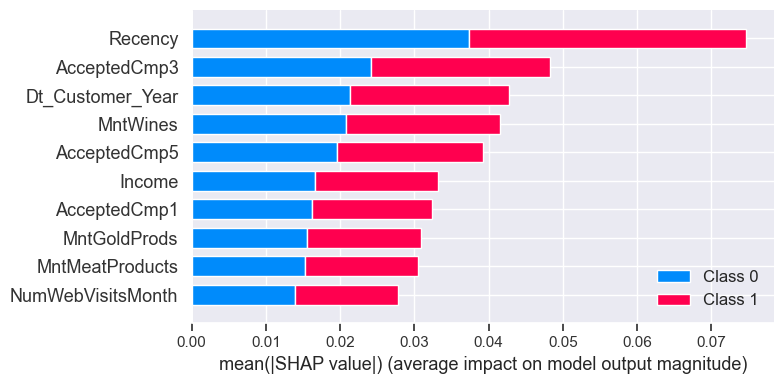

In [164]:
shap.summary_plot(shap_vals_rf, features=x_test, max_display=10, plot_size=(8,4))

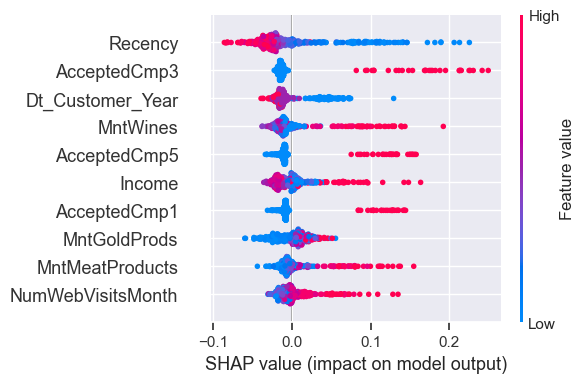

In [165]:
shap.summary_plot(shap_vals_rf[1], features=x_test, max_display=10, plot_size=(6,4))

**Summary**

Based on the interpretation of shap above, 10 top features have been selected which have an impact on model, <br>
where the model itself will be a benchmark in subsequent campaign optimization. <br>
Result that gives + impact on campaign will be accepted as following:<br>
- Customer with lower recency.
- Customer that accept the campaign 3, 5, and 1 has tendency to accept the latest campaign.
- Customer with high income.
- Customer with high interest in wines, gold, and meat products of campaign.
- Total visit of company's web has impact on campaign.

#### Interpretation using Linear Model.
note: this interpretation wont be used as final summary.

In [166]:
masker = shap.maskers.Independent(data=x_train_)

In [167]:
explainer = shap.explainers.Linear(lr, masker=masker)

In [168]:
# explain the model pred
shap_vals = explainer.shap_values(x_test)

In [ ]:
# https://shap-lrjball.readthedocs.io/en/latest/generated/shap.summary_plot.html
# plotting the shap result
shap.summary_plot(shap_vals, features=x_test, max_display=10)